# Exploring the Goldbach conjectures with Sagemath
### H. A. Helfgott

## Table of contents

[I. Introduction: the strong and weak Goldbach conjectures](#Introduction:-the-strong-and-weak-Goldbach-conjectures)

[II. Checking the strong and weak conjectures up to a given $N$](#Checking-the-strong-and-weak-conjectures-up-to-a-given-$N$)

[III. Fourier analysis](#Fourier-analysis)

[IV. Major arc estimates](#Major-arc-estimates)

[V. Minor arcs](#Minor-arcs)

## Introduction: the strong and weak Goldbach conjectures

Leonhard Euler and Christian Goldbach corresponded on an almost daily basis on problems in number theory. In 1742, Goldbach stated a conjecture to Euler, who simplified it and agreed it seemed to be correct, though he could not give a proof. Goldbach's observation really has two halves, which have become known as the strong (or binary) Goldbach conjecture and the weak (or ternary) Goldbach conjecture.

*Ternary, or weak, Goldbach conjecture ("three-prime problem"):*

**Every odd number $n>5$ can be written as the sum of three primes**

*Binary, or strong, Goldbach conjecture (also called just "Goldbach conjecture")*

**Every even number $n>2$ can be written as the sum of two primes**

These conjectures are called *weak* and *strong* because the strong conjecture implies the weak one: if we know that the strong conjecture is true, then, given any odd number $n>5$, since $n-3$ is an even number $>2$, we know it can be written as the sum $p_1+p_2$ of two primes; hence, $n = 3 + p_1 + p_2$.

It is easy to verify the first few cases by hand: $4 = 2 + 2$, $6 = 3+3$, $8 = 3 + 5$, $10 = 3+7$ (and $10 = 5+5$)...

Here is Goldbach's letter to Euler, half in German and half in Latin ("will ich... conjecture hazardieren"): 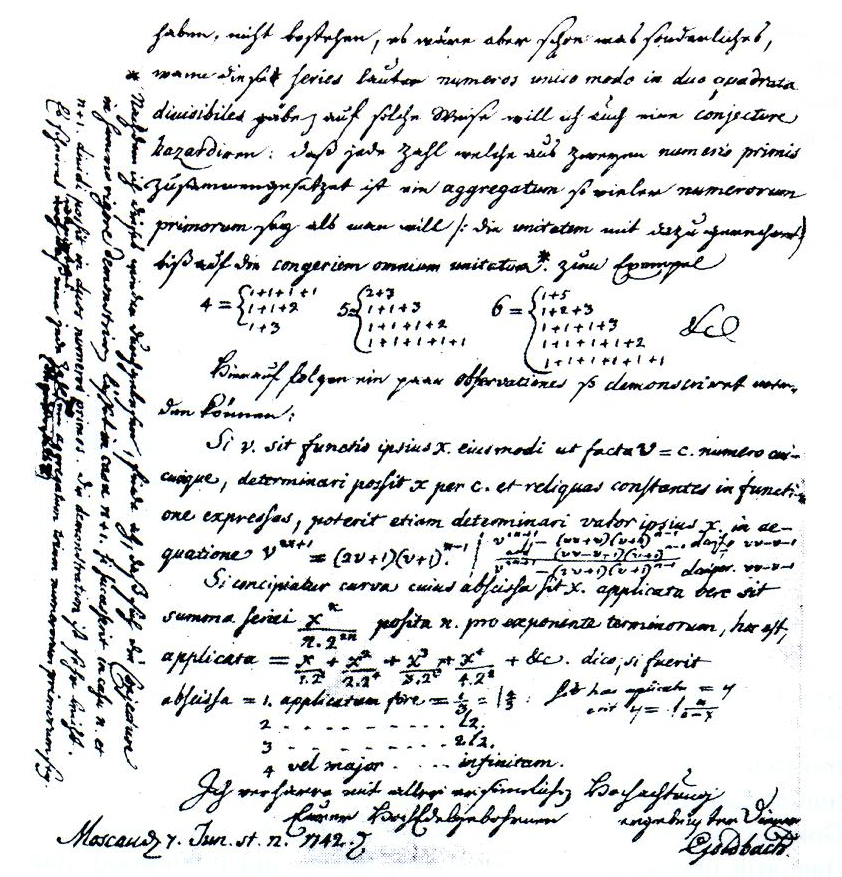


In the 19th century and early 20th century, there were some verifications of the strong conjecture up to a certain number - by hand. Of course we will have fun doing the same in a fraction of a second in Sage.

The great advances came with Hardy, Littlewood and Vinogradov.

**Hardy-Littlewood (1922):** There is a constant $C$ such that **every odd number $\geq C$ can be written as the sum of three primes**, provided that we assume the generalized Riemann hypothesis (GRH).

**Vinogradov (1937):** The same result, unconditionally.

Here is the dynamic duo, Hardy and Littlewood: 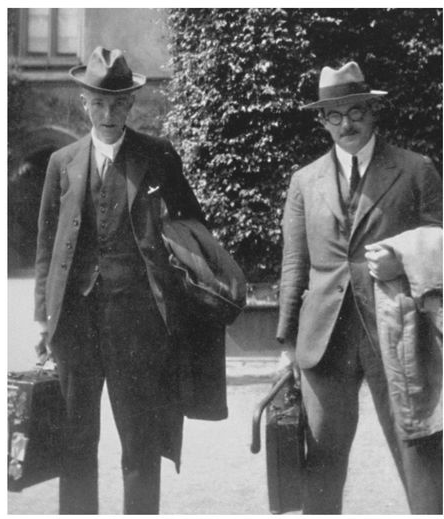
and here is Vinogradov: 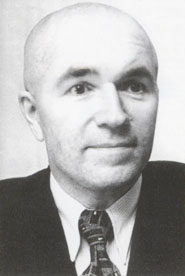

So, why do we not just check all cases $7\leq n\leq C$ by computer, and obtain a proof of the weak Goldbach conjecture for all $n\geq 7$?

The first value of $C$ was given by Borodzkin, a student of Vinogradov's, in his thesis in 1939: the weak Goldbach conjecture is true for all odd $n\geq C$, where $$C = e^{e^{e^{41.96}}}.$$
His result was later improved: $C=3^{3^{15}}$ (Borodzkin, 1956), $C = 3.33\cdot 10^{43000}$ (Wang-Chen, 1989), $C = 2\cdot 10^{1346}$ (Liu-Wang, 2002). 

The problem is that we will never be able to do a check by computer up to $2\cdot 10^{1346}$: for comparison, the number picoseconds since the big bang is $\sim $, and the number of proton and neutrons in the observable universe is $\sim 10^{80}$.

So, clearly we must make the main part of the proof much stronger, that is, we must prove the weak Goldbach conjecture for all odd $n\geq C$ with $C$ much, much smaller than in the above.

That is what I did, and that is how I proved the weak Goldbach conjecture. This worksheet is meant to give an interactive tour of the main ideas that go into the proof.

### Analysis vs. brute force

Wait a minute. It is clear why computers can verify weak Goldbach (and other such statements) for all $n\leq C$, where $C$ is a reasonable constant. (We will do it in a few lines of Sage in a moment.)

However, the main part of our work consists in proving weak Goldbach for $n>C$. How can a proof work only for *large* integers?

This situation is actually typical for proofs coming from analysis. An analytic proof gives you more than just the *existence* of something: it tells you that the number of ways to write $n$ in a certain way (here: $n = p_1 + p_2 + p_3$) is
$$\text{main term} + \text{error term},$$
where the main term is some precise expression $f(n)$, and the error term is something whose absolute value is at most $g(n)$. If $f(n) > g(n)$, then $$\text{main term}+\text{error term}>0,$$ victory is ours!

Here is a highly simplified example: say $f(n) = n^2$, $g(n) = 1000 n^{3/2}$. Then, for $n>C$, where $C = 10^6$, we see that $f(n)> g(n)$, and so a main term $f(n)$ and an error term of absolute value $\geq g(n)$ must add up to $>0$.

How do make $C$ smaller? Mainly by making the error term $g(n)$ smaller. 

(Since we care mainly about existence, we can also "rig the game" by weighing different primes differently, so that some ways to write $n = p_1 + p_2 + p_3$ count more than others, in such a way that $f(n)$ becomes larger compared to $g(n)$. We can also introduce weights for another purpose, namely, so as to make our analysis easier.)

## Checking the strong and weak conjectures up to a given $N$

Let us first check the strong conjecture up to $N=100000$, i.e., let us verify that every even number $4\leq n\leq 100000$ can be written as the sum $n = p_1 + p_2$ of two primes. (Nils Pipping did this check by hand and published it in several papers in 1938--1940.)

First we tell Sage to build the list of all primes up to $N$. (The way to build such a list is to use a *sieve*, e.g., the sieve of Eratosthenes - but Sage knows how to do this, so we can just let it do it.)

In [1]:
N = 100000
primelist = prime_range(2,N+1)

Now we go over each even number $n$ from $4$ up to $N$, and check that there is a prime number $p$ in our list such that $n-p$ is prime.

In [2]:
for n in [4,6..N]:
    failed = True
    for p in primelist:
        if (n-p).is_prime():
            failed = False; break
    if failed:
        print("The strong Goldbach conjecture is false for n =",n); break
if not(failed):
    print("The strong Goldbach conjecture holds up to N =",N)

The strong Goldbach conjecture holds up to N = 100000


(For Sage enthusiasts: if you want to work with much larger $N$, you should use the "primesieve" package, and use it instead of prime_range and is_prime. Let us not talk about that for now.)

Incidentally, Georg Cantor ("about ten years ago", he said in 1894) had verified binary Goldbach by hand for $4\leq n\leq 1000$, and noted that the number of ways of writing $n$ as a sum $p_1+p_2$ seems to go to $\infty$ as $n\to \infty$. A. Desboves had already checked binary Goldbach up to $10000$ in 1855.

<sup>Why would Cantor, of all people, spend his time in something so menial (which had already been done)? Perhaps it is worth mentioning that: 1. people do work things out to get an intuitive feel for them, and this used to include computations we would never do by hand now; for instance, Gauss would sometimes count primes in different intervals of length $1000$ in his spare time; 2. Cantor first checked himself into a mental hospital in 1884.</sup>

Now, given a verification of the strong conjecture up to $N=100000$, we can verify the weak (ternary) conjecture up to a rather large number $M$. How?

All we need to do is produce a list of prime numbers $3= p_1 < p_2 <\dotsc <p_\ell$ such that $p_\ell\geq M$ and $p_{i+1}-p_i \leq N-4$ for all $1\leq i<\ell$. Let us see how the existence of such a list allows us to prove that all odd integers between $7$ and $M$ satisfy the weak conjecture. 

Given an odd integer $7\leq n\leq M$, we can choose the largest $p_i$ in the list such that $p_i\leq n-4$. Then, since $p_i+4\leq n<p_{i+1}+4$, the difference $n-p_i$ must be $\leq p_{i+1}-p_i+4 \leq N$. Of course we also know that $n-p_i\geq 4$ and that $n-p_i$ is even. Hence, by our verification of the strong conjecture up to $N=100000$, there have to exist two primes $p_1'$, $p_2'$ such that $n-p_i = p_1' + p_2'$.

Let us build such a list of primes up to $M = 10^8$, say. (We could go much further up.)

In [3]:
M = 10^8; N = 100000
p = 3; L = [3]; failed = False
while p<M:
    for n in [p+N-4,p+N-6..p]:
        if n.is_prime():
            break
    if n==p:
        print("Prime ladder failed: no primes between",p,"and",p+N-4); failed = True; break
    p = n; L+=[p]
if not(failed):
    print("Prime ladder built up to",M,"with steps of size",N-4)
    print("If strong Goldbach is true up to at least",N,"then weak Goldbach is true up to at least",M)

Prime ladder built up to 100000000 with steps of size 99996
If strong Goldbach is true up to at least 100000 then weak Goldbach is true up to at least 100000000


In [4]:
L

[3,
 99991,
 199967,
 299951,
 399941,
 499927,
 599899,
 699863,
 799859,
 899851,
 999809,
 1099799,
 1199789,
 1299763,
 1399751,
 1499713,
 1599709,
 1699703,
 1799639,
 1899589,
 1999567,
 2099549,
 2199529,
 2299523,
 2399519,
 2499509,
 2599501,
 2699479,
 2799469,
 2899459,
 2999443,
 3099431,
 3199411,
 3299389,
 3399373,
 3499369,
 3599357,
 3699337,
 3799333,
 3899327,
 3999323,
 4099309,
 4199303,
 4299299,
 4399289,
 4499273,
 4599269,
 4699231,
 4799227,
 4899217,
 4999201,
 5099197,
 5199167,
 5299159,
 5399131,
 5499127,
 5599109,
 5699081,
 5799041,
 5899013,
 5999009,
 6099001,
 6198989,
 6298973,
 6398941,
 6498937,
 6598931,
 6698903,
 6798863,
 6898841,
 6998837,
 7098829,
 7198813,
 7298803,
 7398793,
 7498789,
 7598771,
 7698737,
 7798729,
 7898687,
 7998673,
 8098669,
 8198651,
 8298629,
 8398619,
 8498593,
 8598589,
 8698559,
 8798549,
 8898529,
 8998519,
 9098513,
 9198509,
 9298501,
 9398497,
 9498491,
 9598483,
 9698453,
 9798403,
 9898397,
 9998393,
 100983

So weak Goldbach is indeed true for all odd numbers $7\leq n\leq 10^8$.

Oliveira e Silva, Herzog and Pardi (2012) verified strong Goldbach for $4\leq n\leq 4\cdot 10^{18}$ (very large computation, partly in assembly). Helfgott-Platt (2013) used this result and built a ladder $3=p_1<p_2<\dotsc$ to verify weak Goldbach for $7\leq n\leq 8.875\cdot 10^{30}$ (weekend computation on a desktop).

## Fourier analysis
### Fourier series

Let $f:\mathbb{R}\to \mathbb{C}$ be a periodic function ($f(x)=f(x+1)$ for all $x$). If $f$ satisfies some mild technical conditions (say, $f$ integrable and of bounded variation), then one can prove that $f$ can be written as a linear combination of terms of the form $\sin n x$ and $\cos n x$, or, what is the same, a linear combination of the form $e(n x)$, where $e(t) := e^{2\pi i t} = \cos 2\pi t + i \sin 2 \pi t$.

In fact, $f(x)$ can be written as a *Fourier series* $$f(x) = \sum_{n=-\infty}^\infty a_n e( n x),$$ where $$a_n = \int_{0}^1 f(t) e(-n t) dt.$$

Let us see an example. Let $f$ be a *triangle wave*, defined by letting $f(x)$ be $1/2$ less than twice the distance from $x$ to the nearest integer.

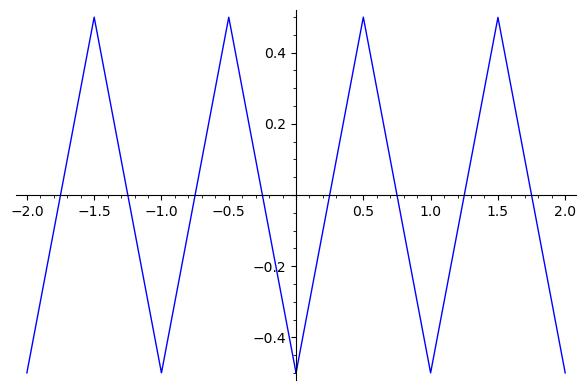

In [5]:
f(x)=-1/2+2*abs(x-floor(x+1/2))
plot(f(x),(x,-2,2))

It is easy to work out that $a_n = \int_0^1 f(t) e(- n t) dt$ equals $0$ for $n=0$, and, for $n$ non-zero,  $$a_n = 4 \int_0^{1/2} t \cos(2\pi n t) d t= \begin{cases} 0 &\text{if $n$ is even,}\\ -2/(\pi n)^2 &\text{if $n$ is odd}\end{cases}$$ (by integration by parts, used twice).

In other words, $$f(x) = - 2 \sum_{\text{$n$ odd}} \frac{e(n x)}{\pi^2 n^2} = 
 - 4 \sum_{\text{$n>0$ odd}} \frac{\cos 2\pi n x}{\pi^2 n^2}.$$

Here is some code for computing the partial sums up to $N$. We shall plot them, and see how they converge to $f(x)$ as $N\to \infty$.

In [6]:
def Sf(N,x):
    S = 0
    for n in [1,3..N]:
        S-=4*cos(2*pi*n*x)/(pi^2*n^2)
    return S

If we take only the first term, then that is of course just a sine wave:

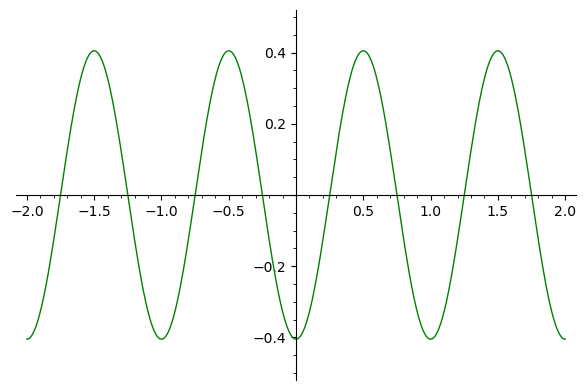

In [7]:
plot(Sf(1,x),(x,-2,2),color="green",ymin=-1/2,ymax=1/2)

Even two terms give us a closer approximation (in black) to the triangle wave (in blue):

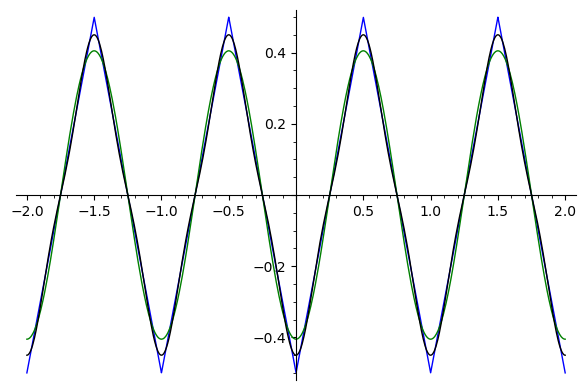

In [8]:
myplot = plot(f(x),(x,-2,2))
myplot += plot(Sf(1,x),(x,-2,2),color="green",ymin=-1/2,ymax=1/2)
myplot += plot(Sf(3,x),(x,-2,2),color="black",ymin=-1/2,ymax=1/2)
myplot

Time for an animation! The partial sums become closer and closer to a triangle wave as we take more terms:

Animation with 9 frames
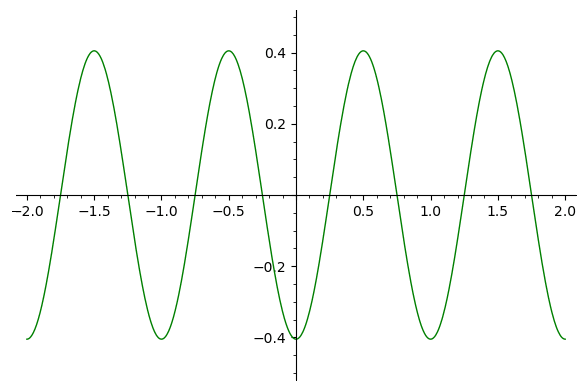

In [9]:
movie = [plot(Sf(k,x),(x,-2,2),color="green",ymin=-1/2,ymax=1/2) for k in [1,3..17]]
animate(movie)

What about 50 terms?

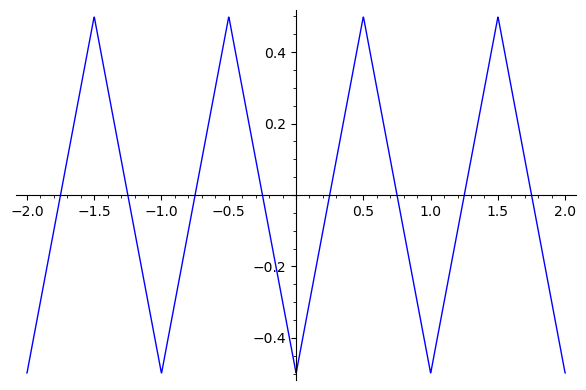

In [10]:
plot(Sf(100,x),(x,-2,2))

### Fourier transforms

Let us look back. A function $f:\mathbb{R}\to \mathbb{C}$ with $f(x) = f(x+1)$ can be seen as a function from $\mathbb{R}/\mathbb{Z} \to \mathbb{C}$ (in that $f(x)$ depends only on the class $x + \mathbb{Z}$). Let $a_n$ be the Fourier coefficients of $f$, as above. We define a function from $\mathbb{Z}$ to $\mathbb{C}$, called the *Fourier transform* of $f:\mathbb{R}/\mathbb{Z}\to \mathbb{C}$, by $n\mapsto a_n$.

More generally, for $f:G\to \mathbb{C}$ a function on a topological abelian group $G$, we can define the Fourier transform of $f$ as a map $\hat{f}:\widehat{G}\to \mathbb{C}$, where $\widehat{G}$ is another abelian group called the *dual* of $G$. What we have seen is that the dual of $\mathbb{R}/\mathbb{Z}$ is $\mathbb{Z}$. The general theory then tells us that the dual of $\mathbb{Z}$ is $\mathbb{R}/\mathbb{Z}$. Let us see what that means in practice.

Let $f:\mathbb{Z}\to \mathbb{C}$ satisfy $\sum_n |f(n)|<\infty$. Then we can write $$f(n) = \int_0^1 \hat{f}(t) e(n t) dt,$$ where the Fourier transform
$\hat{f}:\mathbb{R}/\mathbb{Z}\to \mathbb{C}$ is defined by
$$\hat{f}(t) := \sum_{n\in \mathbb{Z}} f(n) e(- n t).$$ (Verifying that $f(n)$ can be written in this way is straightforward and can be left as an exercise. The same goes for what follows: it is part of the general theory, but can also be derived easily from scratch.)

Let us see an example. The *characteristic function* $1_A$ of a set $A$ is just defined by $1_A(x) =1$ for $x\in A$ and $1_A(x) = 0$ for $x\not\in A$. Now, the characteristic function $1_{\text{primes}}$ of the set of primes does not satisfy $\sum_n |1_{\text{primes}}| <\infty$, since there are infinitely many primes. So, let $A$ be the set of primes $\leq N$ for some $N$. Then we can define the transform $\hat{f}$ for $f = 1_A$. Let us plot $\hat{f}$ for $N=100$, say:

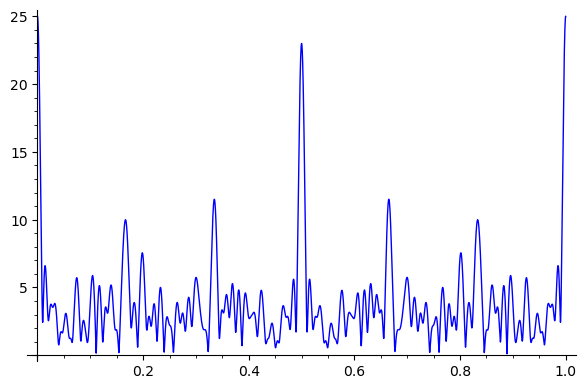

In [11]:
A = prime_range(1,100)
plot(abs(sum(exp(-2*pi*i*n*x) for n in A)),(x,0,1))

and for $N=1000$:

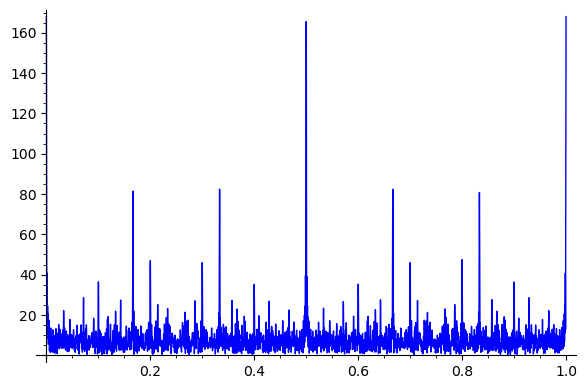

In [12]:
A = prime_range(1,1000)
plot(abs(sum(exp(-2*pi*i*n*x) for n in A)),(x,0,1))

We are seeing some very clear peaks here - and they are precisely at rationals with small denominator:

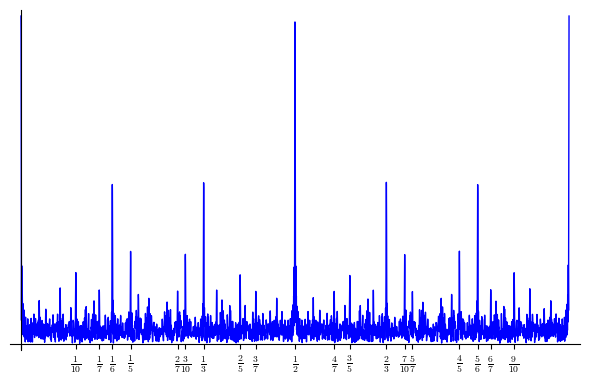

In [13]:
A = prime_range(1,1000)
L = [0]; Lstr = ["0"]
for q in [2..10]:
    if moebius(q)!=0:
        for a in [1..q-1]:
            if gcd(a,q)==1:
                L += [a/q]; Lstr += ["$\\frac{"+str(a)+"}{"+str(q)+"}$"]
plot(abs(sum(exp(-2*pi*i*n*x) for n in A)),(x,0,1),ticks=[L,[]], tick_formatter=[Lstr,[]])

We see that all rationals with small denominator are here, except for those where the denominator is not square-free. (A number $q$ is said to be *square-free* if it is not divisible by any of $4,9,16,25,\dotsc$). We can zoom in to get a better view: 

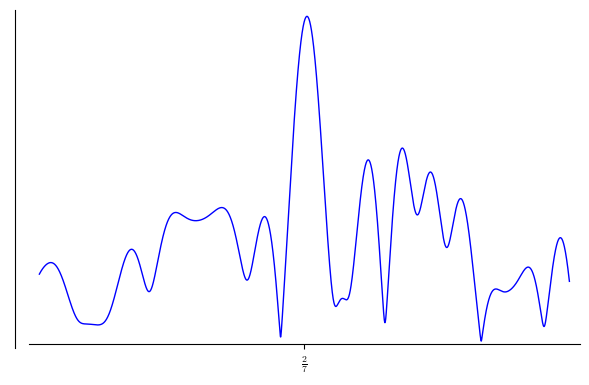

In [14]:
plot(abs(sum(exp(-2*pi*i*n*x) for n in A)),(x,2/7-1/100,2/7+1/100),ticks=[L,[]], tick_formatter=[Lstr,[]])

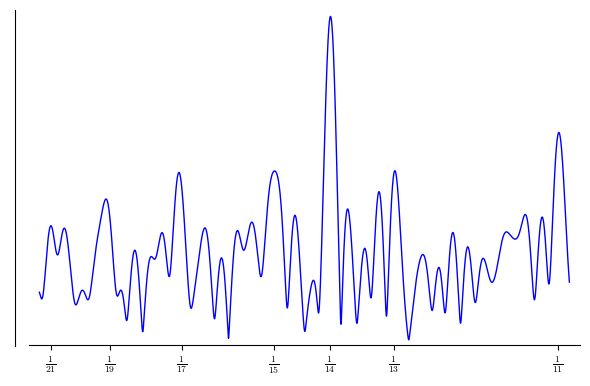

In [15]:
L1 = []; Lstr1 = [];
for q in [11..21]:
    if moebius(q)!=0:
        L1 += [1/q]; Lstr1 += ["$\\frac{"+str(1)+"}{"+str(q)+"}$"]
plot(abs(sum(exp(-2*pi*i*n*x) for n in A)),(x,1/21-1/1000,1/11+1/1000),ticks=[L1,[]], tick_formatter=[Lstr1,[]])

### Convolutions, transforms and Goldbach (the "circle method")

One of the nice general properties of the Fourier transform is that, for the *convolution* $f\ast g$, $$\widehat{f\ast g} = \hat{f} \hat{g}.$$ For $f,g:\mathbb{Z}\to \mathbb{C}$, the convolution $f\ast g:\mathbb{Z}\to \mathbb{C}$ is just given by $$(f\ast g)(n) := \sum_{\substack{m_1,m_2\\m_1+m_2=n}} f(m_1) g(m_2).$$

The convolution of three functions $f_1,f_2,f_3:\mathbb{Z}\to \mathbb{C}$ is just 
$$(f_1\ast f_2 \ast f_3)(n) = \sum_{\substack{m_1,m_2,m_3\\m_1+m_2+m_3 = n}} f_1(m_1) f_2(m_2) f_3(m_3),$$ and, by the above, the Fourier transform of $f_1\ast f_2 \ast f_3$ equals $$\widehat{f_1} \cdot \widehat{f_2} \cdot \widehat{f_3}.$$

Hence, provided that $\sum_n |f_i(n)|<\infty$ for $i=1,2,3$, $$(f_1\ast f_2\ast f_3)(n) = \int_0^1 \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t) e(n t) dt.$$

Why do we care? Say $f_1$, $f_2$, $f_3$ are functions of prime support, i.e., functions such that $f_i(n)=0$ whenever $n$ is not a prime. Then, if $(f_1\ast f_2\ast f_3)(n) \ne 0$, that means that at least one of the terms in the sum $$\sum_{\substack{m_1,m_2,m_3\\m_1+m_2+m_3 = n}} f_1(m_1) f_2(m_2) f_3(m_3)$$ is non-zero, and so there is at least one way to write $n$ as a sum $m_1+m_2+m_3$ with all of $m_1$, $m_2$, $m_3$ being prime.

In other words, to prove weak Goldbach for an odd number $n$, it is enough to prove that $$\int_0^1 \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t) e(n t) dt > 0.$$

*Example*. Let $f_1 = f_2 = f_3 = 1_A$, where $A$ is the set of primes up to $1000$. Then we are trying to show that $$\int_0^1 (\hat{f}(t))^3 e(n t) dt > 0.$$ Here is what $\left|(\hat{f}(t)\right|^3$ looks like:

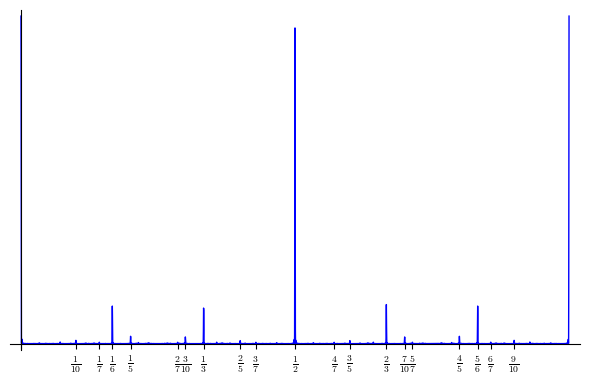

In [16]:
plot(abs(sum(exp(-2*pi*i*n*x) for n in A))^3,(x,0,1),ticks=[L,[]], tick_formatter=[Lstr,[]])

Well, that makes sense: raising a function to the third power amplifies peaks and flattens troughs.

Let $\mathfrak{M}$ be a subset of $\mathbb{R}/\mathbb{Z}$ consisting of what we expect to be the support of these peaks - namely, narrow intervals around rationals $a/q$ with $q$ small and square-free. Let $\mathfrak{m}$ be the complement $\mathfrak{m} = (\mathbb{R}/\mathbb{Z})\setminus \mathfrak{M}$. We can write $$\int_0^1 (\hat{f}(t))^3 e(n t) dt = \int_\mathfrak{M} (\hat{f}(t))^3 e(n t) dt + \int_\mathfrak{m} (\hat{f}(t))^3 e(n t) dt,$$ or more generally $$\int_0^1 \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t) e(n t) dt = 
\int_{\mathfrak{M}} \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t) e(n t) dt + \int_{\mathfrak{m}} \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t) e(n t) dt.$$ Then we can reasonably expect the main contribution coming from the (admittedly tiny) set $\mathfrak{M}$. Accordingly, we call $\mathfrak{M}$ the *major arcs*, and $\mathfrak{m}$ the *minor arcs*. The strategy is then to give a good estimate on the integral over $\mathfrak{M}$ (showing, in particular, that it is not too small) and to prove that the integral $$\int_\mathfrak{m} \left| \widehat{f_1}(t) \widehat{f_2}(t) \widehat{f_3}(t)\right| dt$$ is smaller. Then we will have that our total integral $\int_0^1$ is non-zero, as we desired.

This has been the general strategy ever since Hardy-Littlewood and Vinogradov. Incidentally, this strategy fails for strong Goldbach at this very point: while we do believe that $$\int_0^1 (\hat{f}(t))^2 e(n t) dt = \int_\mathfrak{M} (\hat{f}(t))^2 e(n t) dt + \int_\mathfrak{m} (\hat{f}(t))^2 e(n t) dt$$ is positive, we do not know how to prove it, in that
$$\int_\mathfrak{m} \left|\hat{f}(t)\right|^2 dt$$ is *not* smaller than the integral over the major arcs. (In other words, squaring sharpens peaks and flattens troughs, but much less than cubing does.) We would thus have to work without absolute values, that is, we would have to show that the variation in the argument of $\hat{f}(t)^2 e(n t)$ makes the integral $$\int_\mathfrak{m} \hat{f}(t)^2 e(-n t) dt$$ small. Unfortunately, our estimates on $\hat{f}(t)$ for $t\in \mathfrak{m}$ are not precise enough for this task; in fact, all we know how to do is give upper bounds on $|\hat{f}(t)|$.

### A little interlude: did someone say "circle"?

The "circle" in "circle method" is just $\mathbb{R}/\mathbb{Z}$, which we may see as a circle with circumference $1$ (or as an ourobouros with its head $0$ biting its tail $1$, if you prefer). Let us prove a basic result we will certainly need in a way that will show how visualizing $\mathbb{R}/\mathbb{Z}$ in this way can be useful.

**Dirichlet's approximation theorem.** For any $\alpha$ and any real $Q\geq 1$, there are integers $a,q$ with $1\leq q\leq Q$ such that $|\alpha-a/q|<1/q Q$.

*Proof.* Let $m = \lfloor Q\rfloor$. Consider $0\cdot \alpha, 1\cdot \alpha,\dotsc m\alpha$ in $\mathbb{R}/\mathbb{Z}$. Since those are $m+1$ points, there must be two of them (call them $m_1 \alpha$, $m_2\alpha$, $0\leq m_1<m_2\leq m$) at distance $\leq 1/(m+1)$ from each other. Hence, $m_2 \alpha -m_1 \alpha$ is in an interval $[a-1/(m+1),a+1/(m+1)]$ for some $a\in \mathbb{Z}$. Dividing by $m_2-m_1$, we see that $\alpha$ is in the interval $[a/(m_2-m_1)-\epsilon, a/(m_2-m_1) + \epsilon]$, where $\epsilon = \frac{1}{(m+1) (m_2-m_1)}$. We define $q = m_2 - m_1$, and note that $(m+1) (m_2 -m_1) = (m+1) q > Q q$; we obtain that $|\alpha-a/q|\leq 1/Q q$. *End of proof.*

Here is an example of what $0\cdot \alpha, 1,\alpha,\dotsc, m\alpha$ in $\mathbb{R}/\mathbb{Z}$ look like, for $\alpha = \sqrt{2}$.

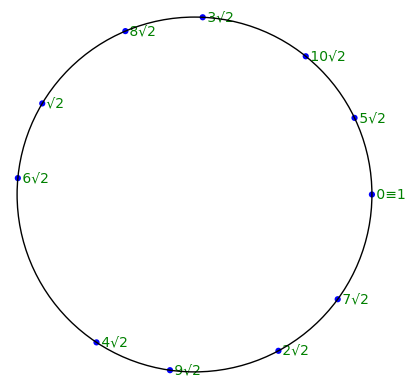

In [24]:
def multiples(alpha, range):
    return [[cos(2*pi*m*alpha),sin(2*pi*m*alpha)] for m in range]

G = circle((0,0),1,edgecolor="black")
N = 10
P = multiples(sqrt(2),[0..N])
G += point(P, pointsize = 20, frame=False, axes=False, aspect_ratio=1)
for j in [0..N]:
    label = [' 0≡1',' √2',' %s√2'%(j)][min(j,2)]
    G += text(label,P[j],horizontal_alignment='left',color='green')
G.show()


## Major arc estimates


Write $f(p) = (\log p) \eta(p/x)$ for $p$ prime, $f(n)=0$ for $n$ not prime, where $\eta:[0,\infty)\to [0,\infty)$ is some function to be chosen later. (Here $x$ is a parameter we will vary. We will assume that $\eta(t)\to 0$ rapidly as $t\to \infty$, and so, when $p$ is much larger than $x$, $\eta(p/x)$ will be very small.) Then $$\hat{f}(\alpha) = \sum_p (\log p) e(- \alpha p) \eta(p/x).$$ We would like to approximate $\hat{f}(\alpha)$ for $\alpha$ very close to a rational $a/q$ of small denominator. Let us start with the case $a/q = 0$, i.e., $|\alpha|$ very small.

### The explicit formula and the Riemann zeta function

We recall that the *Riemann zeta function* $\zeta(s)$ is defined by $$\zeta(s) = \sum_n n^{-s}$$ for complex numbers $s$ with $\Re s > 1$ (otherwise the series does not converge); it is extended to all complex $s$ (with a pole at $s=1$) by analytic continuation. There are two main methods for computing $\zeta(s)$ even when $\Re s\leq 1$: Euler-Maclaurin (or rather a method based closely on the well-known Euler-Maclaurin formula) and the Riemann-Siegel formula (based on the approximate functional equation). Sage uses both, through PARI, ARB and MPFR.

The *zeros* of $\zeta$ are the complex numbers $\rho$ such that $\zeta(\rho)=0$. We know there are no zeros with $\Re \rho \geq 1$, and that the only zeros with $\Re \rho\leq 0$ are $\rho = -2, -4, -6,\dotsc$ (the so-called *trivial zeros*). The zeros $\rho$ with $0<\Re \rho < 1$ (*non-trivial zeros*) are of special interest, for very many reasons - and as we are about to see, they are of interest to us. 

By what is called an *explicit formula* in analytic number theory, for $\alpha = \delta/x$, 
$$\hat{f}(\alpha) = F_\delta(1) \cdot x - \sum_{\text{non-trivial zeros $\rho$ of $\zeta$}} F_\delta(\rho) x^\rho + \text{small error},$$ where $F_\delta$ is the *Mellin transform* of $\eta(t) e(-\delta t)$. The Mellin transform is some sort of close cousin of the Fourier transform; the Mellin transform $\mathscr{M} f$ of a function $f:[0,\infty)\to \mathbb{C}$ is defined by  $$(\mathscr{M} f)(s)= \int_0^\infty f(t) t^{s-1} dt.$$ This integral will converge for all $s$ within a vertical strip in the complex plane $\mathbb{C}$ (or all of the plane $\mathbb{C}$, if $f(x)\to 0$ fast enough as $x\to 0$ and as $x\to \infty$).

We see that the main term for $\hat{f}(\alpha)$ is given by $F_\delta(1)\cdot x$. It is easy to see that $F_\delta(t) = \int_0^\infty \eta(t) e(-\delta t) dt = \hat{\eta}(\delta)$. Thus, $F_\delta(1)$ attains its maximum at $\delta=0$, and will be quite small for $\delta$ larger than a constant.

The *Riemann hypothesis* states that every non-trivial zero $\rho$ of $\zeta$ has real part $\Re \rho = 1/2$. If $\Re \rho = 1/2$, then of course $|x^\rho| = \sqrt{x}$, and so all the terms in the sum in the explicit formula are quite small; $\widehat{f}(\alpha)$ would be very nearly $F_\delta(1)\cdot x$ for all $\delta$ in a broad range.

The Riemann hypothesis remains a conjecture. However, we can prove, using computations, that it holds up to a certain height $H$, that is, that all non-trivial zeros $\rho$ with $|\Im \rho|\leq H$ satisfy $\Re \rho = 1/2$. 

Let us plot the first few non-trivial zeros of the Riemann zeta function. They do all lie on the critical line, that is, they satisfy $\Re \rho = 1/2$:

/opt/sagemath/sage/local/var/lib/sage/venv-python3.10/lib/python3.10/site-packages/sage/plot/scatter_plot.py:134: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  p = subplot.scatter(self.xdata, self.ydata, alpha=options['alpha'],


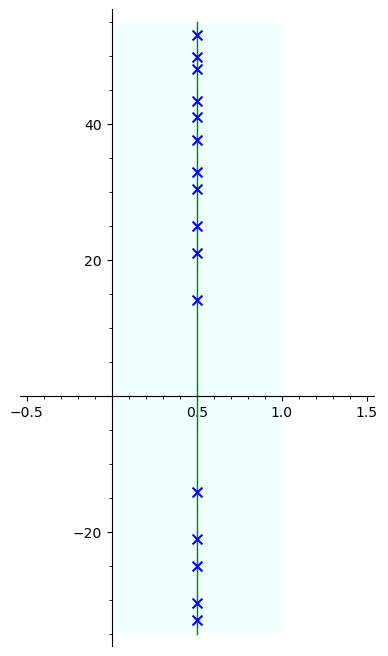

In [26]:
myplot = line([(1/2,-35),(1/2,55)],color='green',aspect_ratio=1/25,figsize=10,xmin=-0.5,xmax=1.5)
myplot += polygon([[0,-35],[0,55],[1,55],[1,-35]],aspect_ratio=1/25,figsize=10,color="azure")
myplot + scatter_plot([[1/2,y] for y in lcalc.zeros(11)]+[[1/2,-y] for y in lcalc.zeros(5)],marker='x',facecolor='blue')


A plot is nice, but how does one actually prove that all zeros $\rho$ with $\Im \rho \le 100$ (say) lie on the critical line $\Re s = 1/2$?

The *completed zeta function* $$\xi(s) = \frac{1}{2} \pi^{-\frac{s}{2}} s (s-1) \Gamma\left(\frac{s}{2}\right) \zeta(s)$$ (where $\Gamma(s)$ is the *Gamma function*) takes only real values for $s$ on the critical line. 

We can see from a plot that there has to be a zero $\rho = 1/2 + i t$ between $t = 13$ and $t= 15$ (in fact, $t = 14.13472\dotsc$):

In [ ]:
plot((lambda t: real(zeta_symmetric(1/2+i*t))),(t,13,15))

All right, but how do we prove it? The fact that $\xi(13)>0$ and $\xi(15)<0$ implies immediately that there is a zero $\rho=1/2+it$ with $13<t<15$. So, all we need to do is compute $\xi(13)$ and $\xi(15)$.

In [ ]:
print("xi(1/2 + i*13) =",zeta_symmetric(1/2+i*13))
print("xi(1/2 + i*15) =",zeta_symmetric(1/2+i*15))


Beware, though: floating-point computations are approximate. (See how the imaginary parts here are not quite zero, even though we know them to be zero!) How do we know these computations are accurate enough to ensure that $\xi(13)>0$ and $\xi(15)<0$?

The standard procedure is to use interval arithmetic, or its variant, ball arithmetic. Sage can use either (interval arithmetic through MPFR, ball arithmetic through ARB).

In [ ]:
def xi(s):
    return (1/2)*pi^(-s/2)*s*(s-1)*gamma(s/2)*zeta(s)

In [ ]:
print("xi(1/2 + i*13) =",CBF(xi(CBF(1/2+13*i))))
print("xi(1/2 + i*15) =",CBF(xi(CBF(1/2+15*i))))


What you see here after "+/-" is an error term. For instance, the imaginary part of $\xi(1/2 + 13 i)$ is now guaranteed to have absolute value $\leq 2.26\cdot 10^{-17}$. More to the point, we now know for a fact that $\Re \xi(1/2+ 13 i) > 0$ and $\Re \xi(1/2+ 15 i)< 0$:

In [ ]:
(CBF(xi(CBF(1/2+13*i))).real()).lower()>0

In [ ]:
(CBF(xi(CBF(1/2+15*i))).real()).upper()<0

In this way, we can hunt for zeros on the critical line, looking at small enough intervals. But how do we know we have caught all zeros on the critical line with $\Im s\leq H$? Even more importantly - how do we know we have caught all non-trivial zeros with $\Im s\leq H$, so that there are no zeros with $\Im s\leq H$ other than the ones on the critical line?

We have a pretty accurate formula for the number of zeros $N(T)$ of $\zeta(s)$ with $0<\Im s \leq T$: $$N(T) = \frac{T}{2\pi} \log \frac{T}{2\pi} - \frac{T}{2\pi } + \frac{7}{8} + \mathrm{error}(T),$$ where $|\mathrm{error}(T)|$ is at most a constant times $\log T$. If $|\mathrm{error}(T)|$ were $<1/2$, we could determine $N(T)$ exactly, just by rounding the formula above to the nearest integer; then we would know whether we have caught all the zeros up to $T$ or not.

Now, $|\text{error}|$ is not $<1/2$, but we do know that $\mathrm{error}(T)-\frac{7}{8}$ is extremely small on average: $$\left|\int_1^H \left(\mathrm{error}(T)-\frac{7}{8}\right) dT\right|\leq c_1 + c_2 \log H.$$ So, if we were missing at least one zero, we would definitely notice - the average of the difference between $N(T)$ and our count would be too large. (This is an observation of Turing's.)

In this way, using interval arithmetic, Platt and Trudgian (2021) have verified the Riemann hypothesis up to height $H = 3\cdot 10^{12}$; that is, they have shown that all the non-trivial zeros $\rho$ with $|\Im \rho|\leq H$ lie on the critical line.

This was obviously *not* done in Sage; they used a combination of C and assembly language, which is what you would do for a massive computation!

So, going back to the explicit formula: let us say we have verified the Riemann hypothesis up to height $H$. We write
    $$\hat{f}(\delta/x) = \hat{\eta}(\delta) x - \sum_{\substack{\text{non-trivial zeros $\rho$ of $\zeta$}\\ \text{with $|\Im \rho|\leq H$}}} F_\delta(\rho) x^\rho - \sum_{\substack{\text{non-trivial zeros $\rho$ of $\zeta$}\\ \text{with $|\Im \rho|> H$}}} F_\delta(\rho) x^\rho  + \text{small error}.$$
 In the first sum, we know that, for every term, $\Re \rho = 1/2$, and so $|x^\rho| = \sqrt{x}$. For $x$ very large, $\sqrt{x}$ is very small compared to $x$, so all is well.

We better choose $\eta$ so that $F_\delta(\rho)$ is very small whenever $|\Im \rho|> H$.

Our $H$ can be so large ($3\cdot 10^{12}$) that this does not look like a tall order. Before we discuss the matter further, though, let us recall that we also care about $\hat{f}(\alpha)$ for $\alpha$ close to rationals $a/q$ with $q$ small, not just for $\alpha$ close to $0$!

### L-functions and the explicit formula

In order to estimate $\hat{f}(\alpha)$ for $\alpha$ close to $a/q$, we need to work with *Dirichlet $L$-functions* modulo q.


 A *Dirichlet character* modulo $q$ is a map $\chi:\mathbb{Z}\to \mathbb{C}$ satisfying:
 - $\chi(n+q) = \chi(n)$ for all $n\in \mathbb{Z}$,
 - $\chi(m n) = \chi(m) \chi(n)$ for all $m,n\in \mathbb{Z}$,
 - $\chi(n) = 0$ whenever $n$ and $q$ are not coprime.
 
 Or, what is the same in slightly fancier, more concise language: $\chi$ is the lift to $\mathbb{Z}$ of a homomorphism $(\mathbb{Z}/q\mathbb{Z})^*\to \mathbb{C}$.

We then define the *Dirichlet $L$-function* $L(s,\chi)$ by $$L(s,\chi) = \sum_{n=1}^\infty \chi(n) n^{-s}$$ for $\Re s > 1$; we extend it to all complex $s$ by analytic continuation.

In many ways, $L(s,\chi)$ is a lot like $\zeta(s)$. We can compute $L(s,\chi)$ by the Euler-Maclaurin formula or Riemann-Siegel. There are no zeros of $L(s,\chi)$ with $\Re s\geq 1$, and we know where the zeros of $L(s,\chi)$ with $\Re s \leq 0$ lie -- namely, either at the odd negative integers or at the even negative integers (including $0$, in most cases).

Again, we call the zeros $s$ with $0< \Re s < 1$ *non-trivial*, and we believe, but do not know, that all non-trivial zeros lie on the critical line, that is, satisfy $\Re s = 1/2$. This is the *Generalized Riemann Hypothesis* **(GRH)**.

We can compute $L(s,\chi)$ (by Euler-Maclaurin or Riemann-Siegel, after a little preliminary work) and verify GRH for a given character $\chi$ up to a certain height $H$, much as before. 

We can write $\hat{f}(a/q+\delta/x)$ as a linear combination of sums $S_{f,\chi}(x) = \sum_{n=1}^\infty \chi(n) e(-\delta n/x) f(n)$. There are explicit formulas for these sums: $$S_{f,\chi}(x) = - \sum_{\text{non-trivial zeros $\rho$ of $L(s,\chi)$}} F_{\delta}(\rho) x^\rho   + \text{small error},$$ where $F_{\delta}$ is the Mellin transform of $\eta(t) e(-\delta t)$, as before.

Again, we will use the explicit formula by verifying that $L(s,\chi)$ obeys GRH, so that 
we can write $$|S_{f,\chi}(x) | \leq x^{1/2}\cdot \sum_{\substack{\text{non-trivial zeros $\rho$ of $L(s,\chi)$}\\ \text{with $|\Im \rho|\leq H$}}} |F_{\delta}(\rho)| + x\cdot \sum_{\substack{\text{non-trivial zeros $\rho$ of $L(s,\chi)$}\\ \text{with $|\Im \rho|> H$}}} |F_{\delta}(\rho)| + \text{small error}.$$ 

We will need to check GRH for each character $\chi$ individually. (We can actually treat all $\chi$ with the same modulus $q$ together, in some sense, but we need to check each modulus individually.) So, it is already clear that (a) we must define the major arcs so that only $a/q+\delta/x$ with $q$ less than a constant lie in the major arcs -- since we can check GRH computationally only for a finite number of moduli -- and (b) $H$ will not be as high as for the Riemann zeta function $\zeta(s)$, since we must split our computational resources among many $q$.

Other than that, the basic issue is much as before: choose $\eta$ such that $F_\delta(\rho)$ is very small whenever $|\Im \rho|>H$, whether $\delta$ is very small or not so small. How do we do that?

### The uncertainty principle

For $\delta$ very small, we may expect the Mellin transform $F_\delta(s)$ of $\eta(t) e(-\delta t)$ to behave much like the Mellin transform $M\eta(s) = F_0(s)$. What happens when $\delta$ is not so small - about $1$, or larger, say?

The *method of stationary phase* suggests that the main contribution to $$F_\delta(s) = \int_0^\infty e(\delta x) \eta(x) x^{s-1} dx$$ comes when the integrand stops oscillating. The part that usually oscillates is $e^{(2\pi \delta x + (\log x) \Im s) i}$; it stops oscillating when $$(-2\pi \delta x + (\log x) \Im s)' = 0,$$ i.e., when $$x = x_0 := \frac{\Im s}{2\pi \delta}.$$ (Obviously, this $x$ is in the range $[0,\infty)$ only if $\mathrm{sgn}(\Im s) = \mathrm{sgn}(\delta)$.) If we work out the contribution to $F_\delta(s)$ of an interval around $x_0$, it turns out to be very roughly proportional to $$\eta\left(\frac{\Im s}{2\pi \delta}\right).$$ (We can be more precise if we know $\Re s$. We are using the method of stationary phase just as an exploratory tool, but it can be used to give precise estimates.)

Since we can only guarantee that $|\Im s|\geq H$, we need to require $|\delta|$ to be no larger than $H/2\pi$ or so; in other words, our "major arc" around $a/q$ will have width at most a constant divided by $x$.

At any rate: we see that we need to choose $\eta$ so that $M\eta(s)$ decreases rapidly as $\Im s$ increases, and $\eta(t)$ also decreases rapidly as $t$ decreases. Now, one cannot require both $\eta$ and $M\eta$ to decrease arbitrarily fast. That would be against...

... the *uncertainty principle*. (Physicists may believe it belongs to them, but we may answer that they are just applying it.) This principle can be seen as a collection of inequalities that are not exactly equivalent to each other but all go in the same direction. The principle is usually phrased informally as "a function and its Fourier transform cannot both be too concentrated around the origin" (or words to that effect), but one can just as well phrase it as "a function and its Mellin transform cannot both decay arbitrarily rapidly". Or, to be more precise: you cannot have a function $\eta$ such that (a) $\eta(t)$ decays more rapidly than any exponential $e^{-C t}$ as $t\to \infty$, (b) $M\eta(\sigma+it)$ decays more rapidly than any exponential $e^{-C |t|}$ as $t\to \infty$ and as $t\to -\infty$. 

What are some possible choices of $\eta$ one might consider? In no particular order, and with no pretension to be exhaustive:


(a) *Exponential smoothing*. Let $\eta(x) = e^{-x}$. Then $M \eta(s) = \Gamma(s)$, and $|\Gamma(1/2 + it)| = \sqrt{2 \pi/(e^{\pi t}+e^{-\pi t})}$, which asymptotes to $\sqrt{2 \pi} e^{-\frac{\pi}{2} |t|}$. In general, for $0\leq \sigma \leq 1$, $|\Gamma(1/2+i t)|$ behaves like a constant times $e^{-\frac{|\pi|}{2} t}$ for $|t|$ large. 

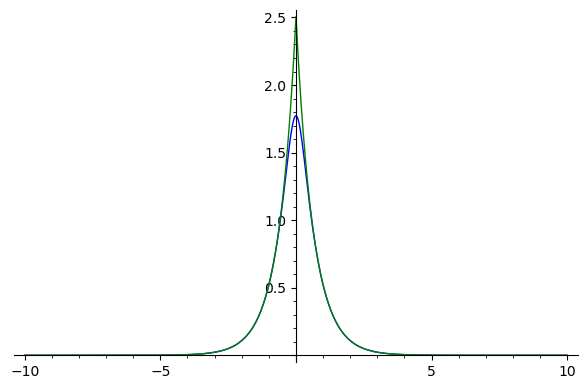

In [18]:
var('t'); plot(abs(gamma(1/2+i*t)),(t,-10,10))+plot(sqrt(2*pi)*exp(-pi*abs(t)/2),(t,-10,10),color="green")

Using a bit of complex analysis, you should be able to prove that the Mellin transform $F_\delta$ of $e(-\delta x) \eta(x)$ is $\frac{\Gamma(s)}{(1+2\pi i \delta)^s}$. Also an exercise: show that, for $\delta> 0$, $$\left|\frac{\Gamma(s)}{(1+2\pi i \delta)^s}\right| = \frac{e^{-\left(\frac{\pi}{2} - \arctan \frac{1}{2\pi \delta}\right) t}}{|1 + 2\pi i \delta|^{\Re s}} \Gamma(s)$$

and so we see that $F_\delta(\sigma + it)$ quite rapidly for $t\to \infty$, while, for $t$ positive and larger than a constant, $F_\delta(\sigma - i t)$ behaves like $e^{-\left(\arctan \frac{1}{2\pi \delta}\right) t}$ times a constant factor. This is exactly as we predicted, as $\arctan \frac{1}{2\pi \delta}$ is roughly $\frac{1}{2\pi \delta}$ for $\delta$ larger than a constant.

Let us visualize an example - say $\delta = 3$, $\sigma = 1/2$.

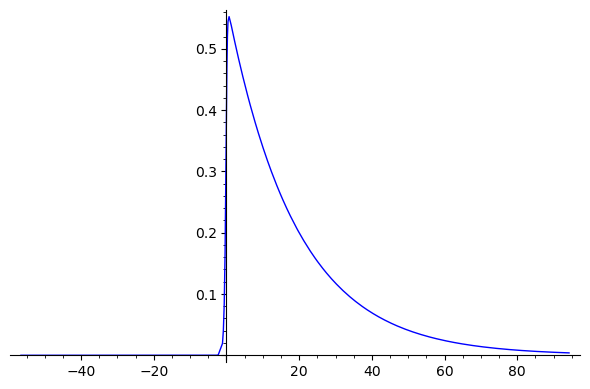

In [19]:
def F(delta,s):
    return gamma(s)/(1+2*pi*i*delta)^s

plot(abs(F(3,1/2+i*t)),(t,-2*pi*3*3,2*pi*3*5))

Or $\delta=-2$, $\sigma=1$. 

In [ ]:
plot(abs(F(-2,1+i*t)),(t,-2*pi*2*5,2*pi*2*3))

So, you see, growth is exponential on both sides, but it is slowed down by a factor of $2\pi \delta$ on one side. In particular, we see that $F_\delta(1+it)$ is *not* negligible for $\sigma = 1$, $t = 5\cdot 2\pi \delta$, say. In order for $F_\delta(1+it)$ to be really quite small, we would need to assume something more like $|t|>100|\delta|$ when $\mathrm{sgn}(t) = \mathrm{sgn}(\delta)$; that is, if $|\delta|$ goes up to $C$, we need to set $H = 100 C$.

That is quite a lot! The complexity of computing all zeros of $L(s,\chi)$ up to $H$ grows more than linearly with $H$; if we use Euler-Maclaurin, it grows at least quadratically. 

We conclude that an exponential smoothing would not be a very good choice in our case.

(b) *Gaussian smoothing.* Let $\eta(t) = \sqrt{\frac{2}{\pi}} e^{-t^2/2}$. (The factor of $\sqrt{2/\pi}$ is there so that $\int_0^1 \eta(t) dt = 1$.) It is easy to show that $M\eta(s) = 2^{s-1}*\Gamma(s/2)$, and so $M\eta(\sigma+it)$ decreases like $e^{-\frac{\pi}{4} |t|}$ as $|t|\to \infty$.

As for $F_\delta = M(\eta(t) e(-\delta x))$ when $\delta$ is small, by our discussion based on the stationary-phase method, we expect $F_\delta(\sigma+it)$ to behave like $\eta(t/2\pi \delta)$ for $\mathrm{sgn}(t)= \mathrm{sgn}(\delta)$.

A more detailed analysis bears this out. It turns out $F_\delta$ is a special function called the *parabolic cylinder function*. Estimating it takes a chapter in my book. Obviously we are not going to do that now - let us just discuss briefly why $\eta(t) = \sqrt{\frac{2}{\pi}} e^{-t^2/2}$ is a good choice.

The expression $e^{-\frac{\pi}{4} t}$ decreases quickly enough. What was bothering us in the case of the exponential function is that $\eta(t/2\pi \delta)$ decreased to slowly. Now, however, $\eta(t/2\pi \delta)$ decreases rapidly: taking $t=5\cdot 2\pi \delta$ again, we see that $\eta(t/2\pi \delta) = \sqrt{\frac{2}{\pi}} e^{-5^2/2} <3\cdot 10^{-6}$, which is not bad, if $t = 6\cdot 2 \pi \delta$, we obtain $\eta(t/2\pi \delta) < 2\cdot 10^{-11}$, which is tiny.

So, the Gaussian smoothing is a good choice; it is in fact what I used in the book.

(c) *Polynomial smoothing.* Let $k$ be an integer. Let $\eta(x) = \frac{1}{k+1} (1-x)^k$ for $0\leq x\leq 1$, and $\eta(x) = 0$ for $x>1$. We see that $\eta$ is of compact support, and smooth outside $x=1$; even at $x=1$, its $(k-1)$th derivative is continuous. In fact, the $k$th derivative of $\eta$ is of *bounded variation*.

In [ ]:
var('s'); assume(s>0); integral((1-x)^4*x^(s-1),(x,0,1))

Old hands at Fourier analysis should then not be surprised that $M\eta$ decreases fairly rapidly. In fact, it is a simple exercise to show that $$M\eta(s) = \frac{k!/(k+1)}{s (s+1) \dotsb (s+k)}.$$ While this does not decrease as rapidly as an exceptional, it is not bad at all for $k$ large ($k\geq 10$, say).

(Incidentally, before proving that $M\eta(s)$ is as above, we could guess it is as above, by typing the following bit of Sage code.)

In [ ]:
var('s'); assume(s>0); integral((1-x)^4*x^(s-1),(x,0,1))

In [ ]:
expand(s*(s+1)*(s+2)*(s+3)*(s+4))

Now, the Mellin transform $F_\delta(s)$ of $\eta(s) e(-\delta s)$ is interesting. If $t\mapsto F_\delta(\sigma+it)$ really behaved like $\eta(t/(2\pi \delta))$, it would have to be of compact support. That cannot be the case (a holomorphic function cannot vanish on a half-line). What happens, rather, is that when $t/2\pi \delta$ gets larger than $1$, rather than vanishing, $F_\delta(t)$ quickly tends to $M\eta(t)$.

More precisely, one can show that $$|F_\delta(s)| \leq \frac{k!/(k+1)}{|s (s+1) \dotsb (s+k)|} \left(1 - \frac{|2\pi \delta|}{|\Im s|}\right)^{-(k+1)}.$$

This is actually rather nice! For $s = 1 + 200 i$, $|\Im s|\leq 3\cdot 2\pi \delta$, $k=10$, say, we obtain:

In [ ]:
def Fdbound(k,s,rat):
    F0 = (factorial(k)/(k+1))
    for j in [0..k]:
        F0 /= (s+j)
    return F0*(1-rat)^(-(k+1))

print(Fdbound(10,1+200*i,1/3).n())

And even for $|\Im s|\leq 2\cdot 2\pi \delta$:

In [ ]:
print(Fdbound(10,1+200*i,1/2).n())

So, for $\delta$ large, we are actually in better shape than with the parabolic cylinder function. We have also avoided special functions, for which some people seem to have a visceral dislike. (Shhh, do not tell them that $F_\delta(s)$ is basically a hypergeometric function...)

At any rate, the conclusion is: we have several possible choices for $\eta$ giving us very good estimates on the major arcs. There is one important caveat, however: because of how we have chosen to estimate what explicit formulas give us - namely, by using finite verifications of GRH for finitely many characters - we are forced to define our major arc set $\mathfrak{M}$ to be the union of arcs around a fixed set of rationals $a/q$, with $q$ bounded by a constant; moreover, these arcs can be of width at most a constant divided by $x$.

Everything else will belong to our minor-arc set $\mathfrak{m}$. Our methods for bounding $\hat{f}(\alpha)$ for $\alpha$ on the minor arcs better be powerful!

(A note to readers from analytic number theory: the main alternative to using finite verifications of GRH would have been to use zero-free regions. Unfortunately, the zero-free regions for $L(s,\chi)$ that we have are not strong enough to be terribly useful for our purposes. This was a weakness of previous work on the weak Goldbach problem.) 

*A question from the audience.* I was asked after the talk: well, Fourier transforms are very nice, but why does one use the Mellin transform?

That is a good question. (In number theory, the Mellin transform is so bread-and-butter than one does not often think why one uses it.) Here is an answer: Fourier transforms are useful for additive problems, such as ours; at the same time, primes "want to be multiplied" (alternatively: they are defined in terms of their divisors), and what corresponds to multiplicative issues is Mellin transforms, not Fourier transforms. (The Mellin transform of the *multiplicative* convolution of two functions $\mathbb{Z}\to \mathbb{C}$ (see below) is the product of their Mellin transforms.) So, we use Fourier transforms because we are adding, and Mellin transforms because what we are adding is primes.

What we have also seen is that Fourier and Mellin transforms, while being cousins (the restriction of a Mellin transform to a vertical line in the complex plane is a Fourier transform with a change of variables), have a bit of a tense relationship: multiplying a function times an exponential phase $e(\delta x)$ can slow down the rate of decay of the Mellin transform of that function very significantly.

All of that is easy compared to the issues we will come across in the...



## Minor arcs

We recall that the minor-arc set $\mathfrak{m}$ is defined to be the complement of the major-arc set $\mathfrak{M}$ in $\mathbb{R}/\mathbb{Z}$. In other words, $\mathfrak{m}$ is the set of all $\alpha \in \mathbb{R}/\mathbb{Z}$ that are *not* close to any rational $a/q$ with $q\leq C$, where $C$ is a constant. (What constant $C$? Well, we check GRH up to a certain $H$ for all $q$ up to a certain $C$; *that* constant $C$.)

We speak of *minor arcs* because
- our plan is precisely to show that they make a minor contribution: for $n$ odd and large, $$\int_\mathfrak{m} |\hat{f}(\alpha)|^3 d\alpha < \int_{\mathfrak{M}} \hat{f}(\alpha)^3 e(n \alpha) d\alpha.$$
- $\mathfrak{m}$ can be seen as a union of arcs: every $\alpha \in \mathbb{R}/\mathbb{Z}$ is close to *some* $a/q$, by Dirichlet's approximation theorem.

For $\alpha$ in the major arcs, we saw how to estimate $\hat{f}(\alpha)$ with high accuracy. For $\alpha$ in the minor arcs, we will just need to give a good enough upper bound on $|\hat{f}(\alpha)|$.

This is really the heart of the proof. We will not be able to get into great detail here, but I hope to be able to show some of what is involved.

In broadest terms, the basic strategy is based on an idea of Vinogradov's: to use a combinatorial identity to reduce the problem of bounding the sum $\hat{f}(\alpha) = \sum_n f(n) e(-n \alpha)$ to the problem of bounding some double sums $\sum \sum$ and triple sums $\sum \sum \sum$.

How is that better? Bounding a double sum is the same as bounding a single sum on average. It should be intuitively clear that we have more of a hope of bounding something on average than of simply bounding something. (Who knows whether it will rain at noon exactly a month from now? Yet we can get a fair idea of how much it will rain next month.)

<sub>That example makes sense in Uganda but less so in climates with a dry season. (If the sum of a non-negative function is zero...)<sub>

There are many combinatorial identities one could use; Vinogradov used one, later work tends to use other identities, I started work using one identity and switch to another one later. Let us see an example of a very simple combinatorial identity. (There are reasons why it cannot really be used for this problem, but it *is* simple.)

Write $\Lambda(n)$ for the *von Mangoldt function*: $$\Lambda(n) = \begin{cases} \log p &\text{if $n$ is a prime power $p^m$, $m\geq 1$,}\\ 0 &\text{otherwise.}\end{cases}$$ Thus $\Lambda$ is like the function that takes the value $\log p$ at primes $p$ and $0$ elsewhere, except it also takes the value $\log p$ at $p^2, p^3,\dotsc$. 

We also define the *Möbius function* $\mu(n)$ by $$\mu(n) = \begin{cases} (-1)^k &\text{if $n$ is the product $p_! p_2 \dotsb p_k$ of $k$ distinct primes}\\ 0 &\text{if $p^2|n$ for some prime $p$.}\end{cases}$$ When we work with functions defined on $\mathbb{Z}_{>0}$ (such as $\Lambda$ and $\mu$), it is customary to write $\ast$ not for the additive convolution, but for the multiplicative convolution (also called *Dirichlet convolution*): $$(f\ast g)(n) = \sum_{d|n} f(d) g\left(\frac{n}{d}\right).$$

It is fun to prove the following identity: $$\Lambda = \mu \ast \log.$$ <sub>Hint: use $\log p_1^{m_1} \dotsb p_k^{m_k} = m_1 \log p_1 + \dotsb + m_k \log p_k$, as well as the fact that $\sum_{d|m} \mu(d)$ equals $1$ for $m=1$ and $0$ for $m>1$. Alternatively, go the sophisticated route: show that $\sum_n \mu(n) n^{-s} = 1/\zeta(s)$, $\sum_n (\log n) n^{-s} = -\zeta'(s)$, $\sum_n \Lambda(n) n^{-s} = -\zeta'(s)/\zeta(s)$, and also prove that $\sum_n (f\ast g)(n) n^{-s} = \sum_n f(n) n^{-s} \cdot \sum_n g(n) n^{-s}$ (purely formally, or in a region where everything converges).</sub>

In [16]:
def diriconv(f,g):
    return (lambda n: sum(f(d)*g(n/d) for d in divisors(n)))
Mangoldt = diriconv(moebius,log)

In [28]:
print("Can you see that (mu*log)(n) is 0 for n composite, at least in the following cases?")
[[n,Mangoldt(n)] for n in [1..20]]

Can you see that (mu*log)(n) is 0 for n composite, at least in the following cases?


[[1, 0],
 [2, log(2)],
 [3, log(3)],
 [4, log(2)],
 [5, log(5)],
 [6, log(6) - log(3) - log(2)],
 [7, log(7)],
 [8, log(2)],
 [9, log(3)],
 [10, log(10) - log(5) - log(2)],
 [11, log(11)],
 [12, log(12) - log(6) - log(2)],
 [13, log(13)],
 [14, log(14) - log(7) - log(2)],
 [15, log(15) - log(5) - log(3)],
 [16, log(2)],
 [17, log(17)],
 [18, log(18) - log(6) - log(3)],
 [19, log(19)],
 [20, log(20) - log(10) - log(2)]]

How do we use the identity $\Lambda = \mu\ast \log$ for our purposes? The quantity $\hat{f}(\alpha)$ we are trying to estimate is practically the same as $S_{\eta,x}(-\alpha) = \sum_n \Lambda(n) e(-\alpha n) \eta(n/x)$, in that the two sums differ by at most a constant times $\sqrt{x}$ (coming from the fact that $\Lambda(n)$ does not vanish at prime powers $p^m$, $m\geq 2$). Now, by the identity above, $$\begin{aligned}S_{\eta,x}(-\alpha) &= \sum_n \left(\sum_{d|n}\mu(d) \log \frac{n}{d}\right) e(-\alpha n) \eta\left(\frac{n}{x}\right)\\ &= \sum_d \mu(d) \sum_m (\log m) e(-\alpha d m) \eta\left(\frac{m}{x/d}\right).\end{aligned}$$

We can split this last double sum in two - one double sum with $d\leq U$, and one double sum with $d>U$, where $U$ is a parameter of our choice. Set $U$ to be considerably less than $x$. Then we do have techniques to estimate the first sum - it is of a form called "sums of type I" since Vinogradov. The second sum is problematic - it is the reason why we will not use the identity $\Lambda = \mu\ast \log$; instead, we should choose an identity that gives us sums of type I as well as sums of a different kind (called "of type II"). More on that later; let us see how one goes about estimating sums of type I.

In general, in the minor arcs, we will need all our bounds to be *log-free*, that is, free of extra factors of size a power of $\log x$ (or greater). A bound of the form, say, $|S_{\eta,x}(\alpha)|\leq (\log x) x/q$ would not be good enough: for $q$ of size about a constant $C$, it would be worse than the trivial bound $x$ as $x\to \infty$, and so it would not be useful for showing that the contribution of the minor arcs is small.

This is the situation to which we committed ourselves when we chose to treat the major arcs in a way that works only for $q$ up to a constant $C$, leaving all $a/q$ with $q>C$ for the minor arcs.


Let us discuss type I sums now and type II sums (which we have not even described) later.

### Type I sums

We will consider a slightly simplified type I sum, namely, $$\sum_{d\leq U} \mu(d) \sum_m e(\alpha d m) \eta\left(\frac{m}{x/d}\right).$$  Different combinatorial identities will give us different variants of this sum (or literally this sum). Our aim will be to bound the above by $x$ times a function of $q$ that goes to $0$ reasonably fast as $q\to \infty$; what we do not want is a bound of the form $x (\log x)/q$, say - such a bound, not being log-free, would not be useful to us. (As we said, the reason is that, even $q$ is larger than a large constant $C$, $(\log x)/q$ will be $\geq 1$ for $x$ large enough.) Think of $U$ as being of size roughly about a power of $x^c$ of $x$, with $0<c<1$; so, a factor of $\log U$ would be as bad as a factor of $\log x$.


Vinogradov already considered these sums, though, as always, he used the "brutal" weight function $$\eta(t) = \begin{cases} 1 &\text{if $0\leq t\leq 1$,}\\ 0&\text{if $t>1$,}\end{cases}$$ or rather, what was the same, he was bounding $$S_{\text{brutal},I}(\alpha) = \sum_{d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m),$$ or a sum to that effect. <sub>English speakers shocked by this level of violence should know that this usage of "brutal" is standard in French.</sub> 

As usual, having a nice weight $\eta$ will help us. (Here "nice" would mean ideally "smooth", but "differentiable almost everywhere and such that $\eta'$ is of bounded variation" is already really great.) Let us talk about that later; let us first consider the unsmoothed sum $S_{\text{brutal},I}(\alpha)$ - first, so that we can discuss Vinogradov's method, and second, so that we can show how we can do better than him, for his own sum $S_{\text{brutal},I}(\alpha)$, without the help of smoothing.

#### Du côté de chez Vinogradov

Vinogradov started as follows: we all know how to sum a geometric progression, and so we can see that, for any $\beta\in \mathbb{R}$,
$$\begin{aligned}
\sum_{n=1}^N e(\beta n) &= e(\beta) \sum_{n=0}^{N-1} e(\beta)^n = e(\beta) \frac{e(\beta)^{N} - 1}{e(\beta)-1} \\
&= e(\beta) \frac{e(\beta N/2)}{e(\beta/2)}\cdot \frac{e(\beta N/2) - e(-\beta N/2)}{e(\beta/2) - e(-\beta/2)} = e(\beta (N+1)/2)\cdot \frac{\sin(\pi \beta N)}{\sin(\pi \beta)}.\end{aligned}$$
Thus, $$\left|\sum_{n=1}^N e(\beta n)\right| = \frac{|\sin(\pi \beta N)|}{|\sin(\pi \beta)|} \leq \frac{1}{|\sin(\pi\beta)|}.$$ Write $\{\beta\}$ for the element of the interval $(-1/2,1/2]$ such that $\beta - \{\beta\}$ is an integer. (Examples: $\{\pi\} = 0.14159\dotsc$, $\{-\pi\} = -0.14159\dotsc$.) Then $|\sin(\pi \beta)|\geq 2 \{\beta\}$ (why?), and so, for $\{\beta\}\ne 0$, $$\left|\sum_{n=1}^N e(\beta n)\right| \leq \frac{1/2}{|\{\beta\}|}.$$ (I suppose you could say that that bound is also true for $\{\beta\}=0$, in the sense that real number is $<\infty$.) We can also use the trivial bound $$\left|\sum_{n=1}^N e(\beta n)\right| \leq N,$$ which is of course valid for any $\beta$, with equality when $\{\beta\}=0$.

###### The case of rational $a/q$

For simplicity, let us first work assuming $\alpha$ is equal to a rational $a/q$. Consider any interval of length $q$ in the outer sum in $S_{\text{brutal},I}(\alpha)$: $$\sum_{d = d_0 + 1}^{d_0 + q} \mu(d) \sum_{m\leq x/d} e(\alpha d m).$$

By the above, we can bound $$\left|\sum_{d = d_0 + 1}^{d_0 + q} \mu(d) \sum_{m\leq x/d} e(\alpha d m)\right| \leq \sum_{d = d_0 + 1}^{d_0 + q} \left|\sum_{m\leq x/d} e(\alpha d m)\right| \leq \sum_{d = d_0 + 1}^{d_0 + q} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right).$$
Now what happens is that, as $d$ goes from $d_0+1$ to $d_0+q$, $\{\alpha d\} = \{a d/q\}$ goes through each $\{r/q\}$, $0\leq r<q$, exactly once, simply because $a d$ goes through each residue $\bmod q$ exactly once. Otherwise put: $\{a d/q\}$ goes through $$-\frac{\lfloor (q-1)/2\rfloor}{q},\dotsc, -\frac{2}{q}, -\frac{1}{q}, 0, \frac{1}{q}, \frac{2}{q},\dotsc \frac{\lfloor q/2\rfloor}{q},$$
just in a different order. We will have $\{a d/q\} = 0$ precisely when $d$ is divisible by $q$. 

In [52]:
#Let's play with this a bit

def curly(beta):
    return floor(1/2-beta)+beta

def curlyalphad(alpha,range):
    return [curly(alpha*d) for d in range]

#some examples
print(curlyalphad(3/7,[1..7]))
print(curlyalphad(3/7,[101..107]))
print(curlyalphad(-13/10,[1..10]))
print(curlyalphad(-13/10,[101..110]))
print(curlyalphad(13/11,[1..11]))
print(curlyalphad(13/11,[101..111]))
print(curlyalphad(13/11,[100..110]))

[3/7, -1/7, 2/7, -2/7, 1/7, -3/7, 0]
[2/7, -2/7, 1/7, -3/7, 0, 3/7, -1/7]
[-3/10, 2/5, 1/10, -1/5, 1/2, 1/5, -1/10, -2/5, 3/10, 0]
[-3/10, 2/5, 1/10, -1/5, 1/2, 1/5, -1/10, -2/5, 3/10, 0]
[2/11, 4/11, -5/11, -3/11, -1/11, 1/11, 3/11, 5/11, -4/11, -2/11, 0]
[4/11, -5/11, -3/11, -1/11, 1/11, 3/11, 5/11, -4/11, -2/11, 0, 2/11]
[2/11, 4/11, -5/11, -3/11, -1/11, 1/11, 3/11, 5/11, -4/11, -2/11, 0]


For simplicity, assume $q|d_0$; then $d$ in the range $d=d_0+1,\dotsc,d_0+q$ is divisible by $q$ precisely when $d = d_0+q$.
We conclude that, if $q|d$, $$\sum_{d = d_0 + 1}^{d_0 + q} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) \leq \frac{x}{d_0+q} + \sum_{r = - \lfloor (q-1)/2\rfloor}^{-1} \frac{1/2}{|r|/q} + 
\sum_{r = 1}^{\lfloor q/2\rfloor} \frac{1/2}{|r|/q} \leq \frac{x}{d_0+q} + \sum_{r = 1}^{\lfloor q/2\rfloor} \frac{q}{r}.$$
You can see that we used the trivial bound $x/d$ for $d = d_0+q$.

For any $M\geq 1$, $\sum_{1\leq r\leq M} \frac{1}{r} \leq \log(M) + 1$, by $\sum_{2\leq r\leq M} \frac{1}{r} \leq \int_1^M \frac{1}{t} dt = \log M$: 

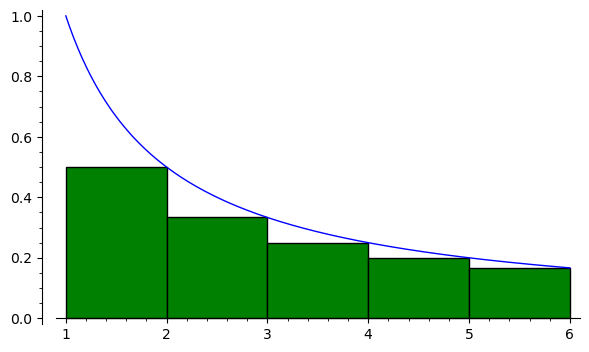

In [35]:
G = plot(1/x,(x,1,6),aspect_ratio=3)
for r in [2..6]:
    G += polygon([[r-1,0],[r-1,1/r],[r,1/r],[r,0]],color="green",edgecolor="black")
G

So, $\sum_{r=1}^{\lfloor q/2\rfloor} 1/r \leq \log(q/2) + 1$. We have thus shown that $$\sum_{d = d_0 + 1}^{d_0 + q} \left| \sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right| \leq \frac{x}{d_0+q} + q \log \frac{e q}{2}$$ assuming $q|d_0$.

We now split the range $d=1,2,\dotsc,U$ into chunks of length $q$. After a bit of summing up, we get $$|S_{\text{brutal},I}(a/q)|\leq \frac{x}{q} \left(\log \left\lceil \frac{U}{q}\right\rceil + 1\right) + (U + q) \log \frac{e q}{2}.$$ 
<details>
    <summary>Actually, let me abuse Markdown's spoiler tag now and from on for boring calculations. You can click on this cell to get a better view.</summary>
    
$$\begin{aligned}|S_{\text{brutal},I}(a/q)|&\leq \sum_{n=0}^{\lceil U/q\rceil - 1} \sum_{d = n q + 1}^{n q + q} \left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right| \leq \sum_{n=0}^{\lceil U/q\rceil - 1} \left(\frac{x}{n q + q} + q \log \frac{e q}{2}\right)\\ &\leq \frac{1}{q} \sum_{n=1}^{\lceil U/q\rceil} \frac{x}{n} + \left\lceil \frac{U}{q}\right\rceil q \log \frac{e q}{2} \leq \frac{x}{q} \left(\log \left\lceil \frac{U}{q}\right\rceil + 1\right) + (U + q) \log \frac{e q}{2}.\end{aligned}$$
</details>

This is nice, but we can already see that it will not be quite enough for us: if $U/q$ is of size at least a power $x^c$ of $x$, our bound will have a term of size $c \frac{x}{q} \log x$, which is precisely what we do not want. The term $(U + q) \log \frac{e q}{2}$ can also be problematic if $q$ is large.

To rephrase matters - there are two problems: (a) for one of every $q$ values of $d$, there will be one for which the inner sum $\left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right|$ gets bounded by the trivial bound $\leq x/d$; the total contribution of such values of $d$ is thus about $\frac{x}{q} \log \frac{U}{q}$; (b) for all the other values of $d$, the inner sum gets bounded by $\log q$ on average. This where we get two problematic factors of $\log$. Smoothing would allow us to do something about (b), but not about (a), at least in any obvious way. We will see what we can do to deal with both (a) and (b) even without smoothing.

Let us go ahead for now, however, and consider the case of $\alpha$ arbitrary.

Ah wait. Things risk becoming a bit boring - and you may ask yourself, given that we are already losing, where exactly are we losing?

Is it perhaps a matter of the somewhat crude inequality $|\sin(\pi \beta)|\geq 2 \{\beta\}$? Not really; that is somewhat crude, but, since $|\sin(\pi \beta)|\leq \pi \beta$, Vinogradov is losing a factor of at most $\pi/2$ here. It is still worth it to recover this constant factor here, as Daboussi and Rivat later did. Let us not get into the details, but just take this excuse to do a little animation. Recall that $$\sum_{d= n q +1}^{n q + q} \left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right| = \sum_{d= n q +1}^{n q + q} \frac{|\sin\left(\pi \frac{a d}{q} \left\lfloor \frac{x}{d}\right\rfloor\right)|}{\left|\sin\left(\pi \frac{a d}{q}\right)\right|}.$$
There's no obvious way to gain in the numerator here: for $x$ large enough, all the integers $\lfloor x/d\rfloor$ for $d = n q + 1,\dotsc, n q + q$ may be multiples of $q$, making $\sin\left(\pi \frac{a d}{q} \left\lfloor \frac{x}{d}\right\rfloor\right)=1$. (Even if there were a subtle way, $\sin(t)$ is $2/\pi$ on average, so there is at most another factor of $\pi/2$ to be saved here.) So, we are really meant to bound $$\sum_{d= n q +1}^{n q + q} \frac{1}{\left|\sin\left(\pi \frac{a d}{q}\right)\right|}.$$

We can bound this by an integral as we bounded a sum of $1/r$ by an integral -- and in fact that is what Daboussi and Rivat did. Since we have other things to do right now, let us just watch a little movie.

Animation with 12 frames
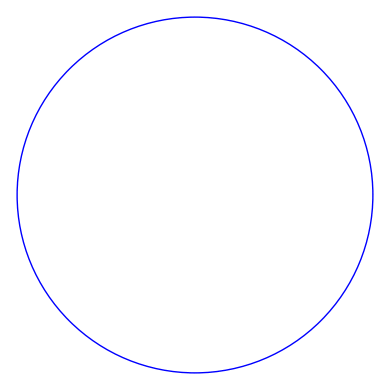

In [35]:
from sage.plot.circle import Circle
from sage.plot.line import Line
 
r = 2
L = circle((0,0),r); L.axes(False)
movie = [L]
for k in [1..11]:
    t = 2*pi*k*5/11
    L += line([(r,0),(r*cos(t),r*sin(t))],color='black'); L.axes(False)
    movie += [L]
animate(movie)

Of course we are meant to add the *inverses* of the length of the segments in this animation.

By the way, you can skip the next subsection for the while being, if you prefer, and come back to it if needed. In work along Vinogradov's lines, the case of $\alpha$ arbitrary is very much like the case of $\alpha$ rational, just hampered slightly by a bit of fuzz ($\alpha-a/q$).

##### The case of $\alpha$ arbitrary

Recall that Dirichlet's approximation theorem assures us that, for any real $Q\geq 1$, there are integers $a,q$ with $1\leq q\leq Q$ such that $|\alpha-a/q|<1/q Q$. Then, for $1\leq d\leq q/2$, we know that $$\alpha d - \frac{a d}{q} \leq \frac{d}{q Q} \leq \frac{1}{2 Q} \leq \frac{1}{2 q}.$$ Now, as $1\leq d\leq q/2$, $\{a d/q\}$ goes through $\lfloor q/2\rfloor$ values among $$-\frac{\lfloor (q-1)/2\rfloor}{q},\dotsc, -\frac{2}{q}, -\frac{1}{q}, \frac{1}{q}, \frac{2}{q},\dotsc \frac{\lfloor q/2\rfloor}{q},$$ skipping $0$; indeed it goes through exactly one of any pair of values $m/q$, $-m/q$ here, since $\{a d/q\}$ would take one of those values for some $d$ and the other one for $q-d$, and, for $1\leq d\leq q-1$, exactly one of $d$, $q-d$ lies between $1$ and $q/2$, inclusive. Hence, $$\begin{aligned}\sum_{1\leq d \leq q/2} \frac{1}{|\{\alpha d\}|}
&\leq \sum_{1\leq r\leq q/2} \frac{1}{\frac{r}{q} - \frac{1}{2 q}} \leq q \left(2 + \sum_{2\leq r\leq q/2} \frac{1}{r - \frac{1}{2}}\right)\leq q \left(2 + \int_1^{q/2} \frac{dt}{t}\right) = q \left( \log \frac{q}{2} + 2\right)
.\end{aligned}$$ since $t\mapsto 1/t$ is convex-up.

<small>Bounding sums using convexity in this way is really something very easy; since we are in Sage, let us illustrate it. In the picture below, the area of the trapezoid with basis in $[n,n-1]$ equals $1/(n-1/2)$. All of these trapezoids are contained under the plot of the function $x\to 1/x$. Hence, the total area of the trapezoids with bases $[1,2], [2,3],\dotsc ,[N-1,N]$ is at most $\int_1^x dx/x$.</small>
    
<small>The same trick works for any other convex-up function $f(x)$, that is, for any function such that $f''(x)\geq 0$ for all $x$, since in any such case the trapezoids lie under the graph of $f(x)$.</small>

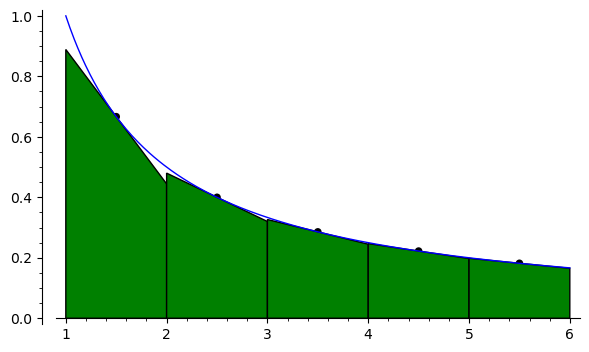

In [5]:
G = plot(1/x,(x,1,6),aspect_ratio=3)
for n in [2..6]:
    midy = 1/(n-1/2)
    der = -1/(n-1/2)^2
    G += polygon([[n-1,0],[n-1,midy-der/2],[n,midy+der/2],[n,0]],color="green",edgecolor="black")
    G += point([n-1/2,midy],color="black",size=30)
G.show()

Now let us look at our sum over a more general interval $d_0+1\leq d\leq d_0+q$: $$\sum_{d = d_0 + 1}^{d_0 + q} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right).$$
We will not be able to avoid the possibility of $\alpha d$ very close to $0$, and so we will use the bound $x/d$ sometimes.

Let us see. Since $|\alpha-a/q|\leq 1/q Q \leq 1/q^2$, we see that, as $d$ ranges from $d_0+1$ to $d_0+q$, the difference $\alpha d - a d/q$ takes values in an interval $[\beta-1/2q,\beta+1/2q]$ of length $1/q$. We can look at the values of $\{a d/q + \beta\}$ on the line: 


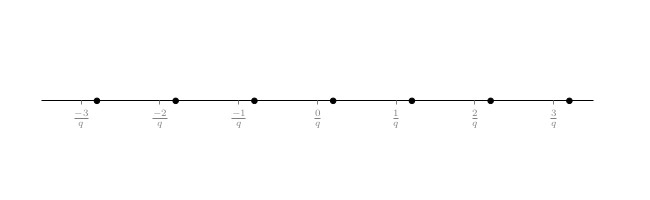

Adding a real number between $-1/2 q$ and $1/2 q$ to $ad/q+\beta$ has (in the worst of all cases) the effect of shifting the values closest to $0$ even closer to $0$ (though only one of them can be shifted literally to $0$). There are at most $\lfloor (q-1)/2\rfloor$ other values of $ad/q+\beta$ to the left of $0$, and at most $\lfloor (q-1)/2$ values to the right of $0$, and, while those on one side get shifted in the worst of cases to points distance $1/q + \gamma, 2/q+\gamma, 3/q+\gamma,\dotsc$ from the origin, where $0\leq \gamma\leq 1/2 q$, whereas those on the other side get shifted, in the worst of cases, to points at distance  $1/q-\gamma, 2/q-\gamma, 3/q -\gamma,\dotsc$ from the origin. Since $t\mapsto 1/t$ is convex-up, the worst case is $\gamma = 1/2 q$.

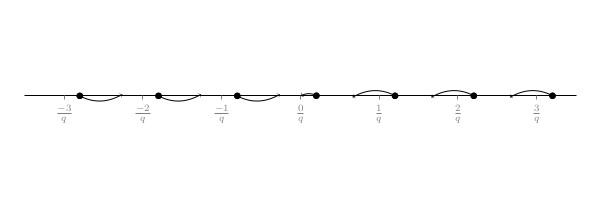

We conclude that
$$\begin{aligned}\sum_{d = d_0 + 1}^{d_0 + q} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) &\leq 2 \frac{x}{d_0+1} + \sum_{r = 1}^{\lfloor (q-1)/2\rfloor} \frac{1/2}{(r-1/2)/q} + \sum_{r = 1}^{\lfloor (q-1)/2\rfloor} \frac{1/2}{(r+1/2)/q}\\ &\leq 2 \frac{x}{d_0+1} + q + \int_{1}^{q/2} \frac{dt}{t} = 2 \frac{x}{d_0+1} + q \log \frac{e q}{2},\end{aligned}$$
where we use again the fact that $t\mapsto 1/t$ is convex-up; we also used the fact that it is decreasing (for $\lfloor (q-1)/2\rfloor \leq t\leq \lfloor (q-1)/2\rfloor + 1/2$).

<details>
    <summary>We can now bound the whole sum over $d\leq U$, dividing the range into sums of the form $\sum_{d=d_0+1}^{d_0+q}$. 
Here is some **dull work** (hint: click).</summary>
$$\begin{aligned}\sum_{d\leq U} \left|\sum_{m\leq x/d} e(\alpha d m)\right| &\leq \sum_{1\leq d\leq q/2} \left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right| +\sum_{n=0}^{\left\lceil \frac{U}{q} - \frac{1}{2}\right\rceil - 1} \sum_{d = n q + \lfloor q/2\rfloor + 1}^{n q + \lfloor q/2\rfloor + q} \left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right|\\ &\leq \frac{q}{2} \left( \log \frac{q}{2} + 2\right) + \sum_{n=0}^{\left\lceil \frac{U}{q} - \frac{1}{2}\right\rceil - 1} \left(2 \frac{x}{n q + \left\lfloor \frac{q}{2}\right\rfloor+1} + q \log \frac{e q}{2}\right).\end{aligned}$$ It is time again for a convexity argument:
$$\sum_{n=0}^A \frac{x}{n q + \left\lfloor \frac{q}{2}\right\rfloor+1} \leq \frac{x}{q/2} + \sum_{n=1}^A \frac{x}{\left(n +\frac{1}{2}\right) q} \leq \frac{2 x}{q} + \frac{x}{q} \int_{1}^{A+1} \frac{dt}{t} = \frac{x}{q} (\log(A + 1) + 2),$$ and so $$\begin{aligned}\left|S_{I,\text{brutal}}(\alpha)\right|\leq \sum_{d\leq U} \left|\sum_{m\leq x/d} e(\alpha d m)\right| &\leq  \frac{q}{2} \left( \log \frac{q}{2} + 2\right) + 2 \frac{x}{q} \left(\log \left\lceil \frac{U}{q}- \frac{1}{2}\right\rceil + 2\right) +  \left(\frac{U}{q} + \frac{1}{2}\right) q \log \frac{e q}{2}.\end{aligned}$$
</details>

We conclude that $$\begin{aligned}\left|S_{I,\text{brutal}}(\alpha)\right|\leq  \frac{2 x}{q} \left(\log \left(\frac{U}{q} + \frac{1}{2}\right)+ 1\right) + (U + q) \log q + q \left(\frac{3}{2} - \log 2\right).\end{aligned}$$

This is practically as nice as what we had before in the special case $\alpha=a/q$. There are the same issues now as there were then: $\log \left(\frac{U}{q} + \frac{1}{2}\right)$ is a $\log$ too many, and for that matter $(U+q) \log q$ could also be problematic.

This is where matters essentially stood, at least in explicit work; for instance, the Type I estimates in Wang and Chen's work (1994; Wang and Chen established weak Goldbach for odd numbers $\geq 10^{43000}$ in 1989, with an improvement to $\geq 10^{7194}$ in 1996), quoted in Liu and Wang's work (2001), or in Daboussi-Rivat (2000), or in Tao's 2012 paper on sums of five primes were not log-free. There were some improvements (for instance, Daboussi and Rivat worked with $\frac{1}{|\sin(\pi \beta)|}$ directly instead of bounding it by $\frac{1}{2 \{\beta\}}$; also, Tao used smoothing), and we will learn from them, but the main issue, in our context, was to prove good log-free estimates.

#### Take that, I. M. 

Our task is to give a bound on $$S_{\text{brutal},I}(\alpha) = \sum_{d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m)$$ free of factors of $\log x$, and, of preference, free of factors of $\log q$, at least in any terms that could become the main term. 

<small>We can and will assume that $U\leq x$, as the inner sum would be empty for $d>x$.</small>

Let us start as before, with the case of $\alpha = a/q$. (Just as before, we do so purely for pedagogical purposes -- though now the difficulties for $\alpha$ *not* of this form will be both greater and more interesting, as we shall later see.) Ideally, we would like to allow $q$ to be as large as $x/C$, $C$ a constant, though we will later see that we can actually force $q$ to be smaller than $x^{\alpha}$ for some $\alpha<1$.

##### The case of $\alpha = a/q$

In the case of $\alpha = a/q$, we know exactly when $\{\alpha d\}$ is small (indeed, equal to $0$): namely, when $d$ is divisibly by $q$. It is those $d$ that were contributing a nasty term of size about $\frac{x}{q} \log \frac{U}{q}$. So, we set those terms aside: $$\sum_{\substack{d\leq U\\ q|d}} \mu(d) \sum_{n\leq x/d} e(\alpha d m).$$ Let us call this sum "$S_{\text{special},q}(\alpha)$". Since $\alpha = a/q$, $$\begin{aligned}S_{\text{special},q}(\alpha) &= \sum_{\substack{d\leq U\\ q|d}} \mu(d) \left\lfloor \frac{x}{d} \right\rfloor = \mu(q) \sum_{\substack{m\leq U/d\\ (m,q)=1}} \mu(d) \left\lfloor \frac{x}{q d} \right\rfloor\\ &= \mu(q) \frac{x}{q} \sum_{\substack{m\leq U/d\\ (m,q)=1}} \frac{\mu(d)}{d} + O^*\left(\mu^2(q) \frac{U}{q}\right),\end{aligned}$$
where we write $O^*(\text{something})$ to mean "a quantity of absolute value at most $\text{something}$", and $(a,b)$ means just the greatest common divisor of $a$ and $b$, not the ordered pair $(a,b)$. (This is standard notation; things should be clear from context.) Note that $\mu^2(q)$ is just $|\mu(q)|$; people like squares.

Now, there's plenty on sums of the form $\sum_{m\leq U/d : (m,q)=1} \mu(d)/d$ in the literature. Let us go on a little 19th-century side-quest to prove that it has absolute value at most $1$; this is enough for our purposes. 

<small>(Of course there are better bounds, better by a lot; in fact I'm working on proving bounds better than those in the literature. Old hands at analytic number theory will see the problem of bounding $\sum_{d\leq y} \mu(d)/d$ as analogous to that of bounding $\sum_{p\leq y} (\log p)/p$. In fact, in the explicit regime, the first problem is harder. There is a good complex-analytic reason for this - we do not know the residues of $1/\zeta(s)$, whereas the residue of $- \zeta'(s)/\zeta(s)$ is just the multiplicity of the zero $s$; moreover, $1/\zeta(s)$ is very hard to bound well within the so-called critical strip. You can already see how this would not be a little side-quest, but a pretty major one! Let us get right back on track...)</small>

###### Little 19th-century side-quest

First of all, there's the very basic identity $$\sum_{d|n} \mu(d) = \begin{cases} 1 &\text{if $n=1$,}\\ 0&\text{if $n>1$.}\end{cases}$$ (If you don't know it, prove it now.) So, as Meissel pointed out in 1854, for any $x>0$, $$\sum_{d\leq x} \mu(d) \left\lfloor \frac{x}{d}\right\rceil = \sum_{d\leq x} \mu(d) \sum_{\substack{n\leq x\\d|n}} 1 = \sum_{n\leq x} \sum_{d|n} \mu(n) = 1.$$
Gram (1884) used this identity in the following way: assuming, as we may, that $x$ is an integer, $$\begin{aligned}\sum_{d\leq x} \frac{\mu(d)}{d} &= \frac{1}{x} \sum_{d\leq x} \mu(d) \frac{x}{d} = \frac{1}{x} \left(\sum_{d\leq x} \mu(d) \left\lfloor \frac{x}{d}\right\rfloor + \sum_{1<d\leq x} O^*(1)\right)\\ &= \frac{1}{x} (O^*(1) + O^*(x-1)) = O^*(1),\end{aligned}$$ where we where able to write $1<d\leq x$ instead of $1\leq d\leq x$ because $\lfloor x/d\rfloor = x/d$ for $x$ an integer and $d=1$.

We can easily generalize these identities as well as Gram's bound. First of all, for any $q\geq 1$, $$\sum_{\substack{d|n\\(d,q)=1}} \mu(d) = \begin{cases} 1 &\text{if $p|q$ for every $p|n$,}\\ 0 &\text{otherwise.}\end{cases}$$
Now you can show, following Meissel, that $$\sum_{\substack{d\leq x\\(d,q)=1}} \mu(d) \left\lfloor \frac{x}{d}\right\rfloor = |\{n\leq x: p|n\Rightarrow p|q\}|,$$ where we write $|S|$ for the number of elements of a set $S$. Prove, following Gram, that, for any $q\geq 1$, $$\sum_{\substack{d\leq x\\(d,q)=1}} \frac{\mu(d)}{d} = O^*(1).$$

*End of little 19th-century side-quest*

We conclude that $$\begin{aligned}\left|S_{\text{special},q}(\alpha)\right| \leq \frac{\mu^2(q)}{q} (x+U).\end{aligned}$$ As we implied before, we can do much better, but this is enough for now, as we were aiming for a log-free bound.

What about the sum of the other terms, namely, $$\sum_{\substack{d\leq U\\ q\nmid d}} \mu(d) \sum_{n\leq x/d} e(\alpha d m),$$ which we may call $S_{\text{not special},q}(\alpha)$? We could proceed exactly as before, and bound it by $(U+q) \log \frac{e q}{2}$. Let us see how we can do a little better. (We will be able to do even better later, once we smooth.)

As before, we split the sum over $d$ into intervals of length $q$; since we are leaving out the terms with $d$ divisible by $q$, we are left to bound the sum $$\sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right),$$ with $d_0$ divisible by $q$. Since $\alpha=a/q$, $\alpha d$ equals $a d/q$; as $d$ goes from $d_0+1$ to $d_0+q-1$, $a d \bmod q$ cycles over all residues modulo $q$ other than $0$. In other words, $\{\alpha d\}$ goes through $$-\frac{\lfloor (q-1)/2\rfloor}{q},\dotsc, -\frac{2}{q}, -\frac{1}{q}, \frac{1}{q}, \frac{2}{q},\dotsc \frac{\lfloor q/2\rfloor}{q}$$ in some order; notice we have left $0$ out. Now, if $r/q$ is such that $(1/2)/|r/q|$ is larger than $x/d_0$, it makes sense to use the bound $x/d$ (which is at most $x/d_0$) instead of $(1/2)/|\{\alpha d\}|$. Clearly, this happens precisely when $|r|\leq d_0 q/2 x$. The sum over such $r$ is less than $$2 \sum_{r=1}^{\left\lfloor \frac{d_0 q}{2 x}\right\rfloor} \frac{x}{d_0} \leq 2 \frac{d_0 q}{2 x} \frac{x}{d_0} = q.$$ The sum over all other $r$ is at most $$\begin{aligned}2 \sum_{r= \left\lfloor \frac{d_0 q}{2 x}\right\rfloor + 1}^{\lfloor q/2\rfloor} \frac{1/2}{r/q} &\leq q \sum_{r= \left\lfloor \frac{d_0 q}{2 x}\right\rfloor + 1}^{\lfloor q/2\rfloor} \frac{1}{r} \leq q \left(\frac{1}{\max\left(\frac{d_0 q}{2 x},1\right)} + \int_{\max\left(\frac{d_0 q}{2 x},1\right)}^{q/2} \frac{dt}{t}\right)\\ &= q \left(1 + \log \min\left(\frac{x}{d_0},\frac{q}{2}\right)\right).\end{aligned}$$ Of course, if $x/d_0>q/2$, then $d_0 q/2 x < 1$ and so the first sum was empty. Hence, the total is at most $$\leq q \log \min\left(\frac{e^2 x}{d_0},\frac{e q}{2}\right).$$

<details>
    <summary>Summing over the entire range $1\leq d\leq U$, split into intervals of length $\leq q$, we get (through a bit of **dull work**)</summary>
    $$\begin{aligned}\left|S_{\text{not special},q}(\alpha)\right|&\leq \sum_{n=0}^{\lceil U/q\rceil - 1} \sum_{d = n q + 1}^{n q + q-1} \left|\sum_{m\leq x/d} e\left(\frac{a}{q} d m\right)\right| \leq  \sum_{n=0}^{\lceil U/q\rceil - 1} q \log \min\left(\frac{e^2 x}{n q},\frac{e q}{2}\right)\\ &\leq q \log \frac{e q}{2} + \sum_{n=1}^{\lceil U/q\rceil - 1} q \log \min\left(\frac{e^2 x}{n q},\frac{e q}{2}\right).\end{aligned}$$ We can bound this total by $(U+ q) \log \frac{e q}{2}$, as before. Alternatively, we can bound it by $$\begin{aligned}q \log \frac{e q}{2} + \sum_{n=1}^{\lceil U/q\rceil - 1} q \log \frac{e^2 x}{n q}
&\leq q \log \frac{e q}{2} +
q \int_{0}^{U/q} \log \frac{e^2 x}{t q} dt.\end{aligned}$$ Now, for any $y_1, y_2>0$, $$\int_0^{y_1} \log \frac{y_2}{t} dt = y_1 \log \frac{y_2}{y_1} + \int_0^{y_1} \log \frac{y_1}{t} dt = y_1 \log \frac{y_2}{y_1} + t \log \frac{e y_1}{t} |_{0^+}^{y_1} = y_1 \log \frac{e y_2}{y_1}.$$ Hence, $$q \int_{0}^{U/q} \log \frac{e^2 x}{t q} dt \leq U \log \frac{e^3 x}{U}.$$
(We could of course have switched from the bound $e q/2$ to the bound $e^2 x/ n q$ when $n$ is close to $2 e x/q^2$, provided that $q\leq \sqrt{2 e x}$, but doing so actually would have given only minor gains, as you can check if you want.) Therefore,

</details>
    $$\left|S_{\text{not special},q}(\alpha)\right|\leq q \log \frac{ e q}{2} + U \log \min\left(\frac{e q}{2}, \frac{e^3 x}{U}\right).$$


We conclude that $$\begin{aligned}\left|S_{\text{brutal},I}(\alpha)\right| &\leq \left|S_{\text{special},q}(\alpha)\right| + \left|S_{\text{not special},q}(\alpha)\right|\\ &\leq \frac{\mu^2(q)}{q} (x+U) + q \log \frac{ e q}{2} + U \log \min\left(\frac{e q}{2}, \frac{e^3 x}{U}\right).\end{aligned}$$
This looks clean and good enough: the first and the last term are in effect log-free (if $U$ is as large as $x/C$, then $e^3 x/U$ is small), and it wasn't very hard. The problem is of course what to do if $\alpha$ is not of the form $a/q$.

Passing to $\alpha$ not of the form $a/q$ is less obvious here than in Vinogradov's work. (Presumably others noticed all of the above long ago, and said nothing because they could not pass to general $\alpha$.) Fortunately, there is a solution that is not all that hard - based on an existing idea in Diophantine analysis, namely, switching approximations. Let us see what one can do.

##### The case of general $\alpha$

As we know, given $\alpha\in \mathbb{R}$ and given $Q\geq 1$, we can always find $a/q$, $q\leq Q$, such that $|\alpha-a/q|<1/q Q$ (Dirichlet). Let us look split the outer sum in  $S_{\text{brutal},I}$ according to whether $d\leq Q/2$ or not:
$$S_{\text{brutal},I}(\alpha) = \sum_{d\leq \min(Q/2,U)} \mu(d) \sum_{m\leq x/d} e(\alpha d m) + \sum_{Q/2<d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m).$$
In the first sum, since $d\leq Q/2$, we know that $|\alpha d - a d/q|\leq 1/2 q$, and so we know that the values of $d$ with $\{\alpha d\}$ close to $0$ are precisely those that are divisible by $q$; we will be able to proceed much as for $\alpha=a/q$. The second sum is more problematic: if $d>Q/2$, we do not know that $\{\alpha d\}$ is closest to $0$ when $d$ is divisible by $q$, and so it would not help to take out those terms. Singling out the terms for which $\{\alpha d\}$ *is* closest to zero would involve bounding sums of the form $$\sum_{\substack{d_0<d\leq d_1\\d\equiv a \bmod q}} \frac{\mu(d)}{d}$$ for some $d_0$, $d_1$ and some $a\not\equiv 0 \bmod q$, and that is much harder than the case $a\equiv 0 \bmod q$. (The "deep" reason for that is that $L$-functions modulo $q$ are involved; we really do not want to deal with them for $q$ unbounded.) We are in a bit of a pickle: if we do not single out the terms with $\{\alpha d\}$ very close to $0$, they will contribute a term of size $(x/q) \log(U/(Q/2))$ or so. We want log-free bounds.

There are at least two ways out of this issue. One of them is to set $Q$ so large that $Q/2\geq U$ (so that the sum over $Q/2<d\leq U$ is empty) or at least so large than $U/(Q/2)$ is bounded by a constant. We can see why this choice would be problematic: we could have $q$ very large, e.g. $q$ equal to $Q$ or almost; then the term $q \log \frac{e q}{2}$ we got before would not be log-free, as it would be of size $2 U \log e U$. This problem will become less serious once we introduce smoothing, and so perhaps the simple tactic of setting $Q/2\geq U$ is a defensible choice. We have, however, said we want to estimate $S_{I,\text{brutal}}$; let us keep aiming for that goal (and introduce techniques that will work in the smoothed case as well).


Here is another way out of the issue - one that works for $S_{I,\text{brutal}}$, and will also work for smoothed sums later. 

Let $\alpha\in \mathbb{R}$, and $a$, $q$ coprime be such that $\epsilon = |\alpha - a/q|$ obeys $\epsilon \leq 1/q^2$. (Any approximation given by Dirichlet's approximation theorem is of this form.) Assume $\epsilon>0$, and write $Q= 1/\epsilon q$. (Thus, if $\epsilon< 1/q Q'$ for some other $Q'$, then $Q>Q'$.) Then we claim that there exist coprime integers $a'$, $q'$ such that $$\left|\alpha - \frac{a'}{q'}\right| \leq \frac{1}{q' Q}\;\;\;\;\;\text{and}\;\;\;\;\;\frac{Q}{2}<q'\leq Q.$$ In other words, $a'/q'$ is a valid approximation to $\alpha$ ("valid" as in "satisfying the conditions of Dirichlet's approximation theorem") *with $q'$ guaranteed to be large*. 

Why is this true? Suppose it's not true already for $a'/q' = a/q$, i.e., suppose that $q\leq Q/2$. By Dirichlet's approximation theorem (as we have stated it, with a strict inequality), there is an $a'/q'$ such that $q'\leq Q$ and $|\alpha -a'/q'|< 1/ q' Q$. Since $|\alpha - a/q| = 1/q Q$ (by definition of $Q$), $a'/q'$ and $a/q$ cannot be equal. Hence, $|a/q - a'/q'| \geq 1/ q q'$. At the same time, by the triangle inequality, $$\left|\frac{a}{q} - \frac{a'}{q'}\right|\leq \left|\alpha - \frac{a}{q}\right| + \left|\alpha - \frac{a'}{q'}\right| < \frac{1}{q Q} + \frac{1}{q' Q}.$$ So, $$\frac{1}{q q'} < \frac{1}{q Q} + \frac{1}{q' Q},$$ and, multiplying both sides by $q q' Q$, we obtain that $$q + q' > Q.$$
Since we assumed that $q\leq Q/2$, it follows that $q' > Q/2$, quod erat demonstrandum.

Let's see a little Sage demonstration.

In [48]:
def diophappr(x,Q):
    """Returns an approximation a/q to x with |x-a/q|<1/q Q and q<=Q
    """
    L = continued_fraction(x).convergents()
    return next(aq for aq in L if abs(x-aq)<1/(denominator(aq)*Q))

def competitor(x,aq):
    eps = abs(x-aq)
    Q = 1/(eps*denominator(aq))
    if denominator(aq)>Q/2:
        return (aq,Q)
    else:
        return (diophappr(x,Q),Q)

In [87]:
res = competitor(pi,355/113)
print(res[0],res[1].n())
res = competitor(pi,22/7)
print(res[0],res[1].n())
res = competitor(e,11/4)
print(res[0],res[1].n())
res = competitor(pi,103993/33102)
print(res[0],res[1].n())
res = competitor(pi,104348/33215)
print(res[0],res[1].n())
res = competitor(pi,521030/165849) #not a continued-fraction approximant
print(res[0],res[1].n())

103993/33102 33173.7087420293
333/106 112.976160846795
11/4 7.88191714258171
103993/33102 52275.7313208395
208341/66317 90785.0788378951
521030/165849 191806.541510071


Now, the existence of such an approximation $a'/q'$ was certainly not unknown; you can find a statement much like the above as exercise 2 in chapter 2 of Vaughan's *The Hardy-Littlewood Method*. However, I am not aware of its being used quite as we are about to use it - switching from one approximation to another in the middle of estimating a sum - and at any rate it wasn't used for sums coming from Goldbach's problem, for whatever reason, so let us pay attention.

Again, we start from an approximation $a/q$ to $\alpha$ with $\alpha = a/q + \delta/x$, say. We write $\epsilon:= |\delta/x| = |\alpha-a/q|\leq 1/q^2$, and define $Q = 1/\epsilon q$. The first sum $$\sum_{d\leq \min(Q/2,U)} \mu(d) \sum_{m\leq x/d} e(\alpha d m)$$ can be bounded much as before. Let us get it out of the way quickly.

First, again by summing a geometric series: for $y\geq 0$ arbitrary (not necessarily an integer),
$$\begin{aligned}
\sum_{1\leq n\leq y} e(\beta n) &= \frac{e\left(\left(\lfloor y\rfloor + \frac{1}{2}\right)\beta\right) -
e\left(-\frac{\beta}{2}\right)}{e(\beta/2) - e(-\beta/2)}.\end{aligned}$$
Clearly $e(-\beta/2) = 1 + O^*(|e(-\beta/2)-1|) = 1 + O^*(|e(\beta/4)-e(-\beta/4)|) = 1 + O^*\left(2\sin \frac{\pi \beta}{2}\right)$, and similarly $e((\lfloor y\rfloor + 1/2)\beta) = e(y \beta) + O^*\left(2\sin \frac{\pi \beta}{2}\right)$ (since $|(\lfloor y\rfloor + 1/2)-y|\leq 1/2$). Hence $$\sum_{1\leq n\leq y} e(\beta n) = \frac{e(y \beta) - 1 }{2 \sin \pi \beta} + \frac{O^*(2 \sin \frac{\pi \beta}{2})}{\sin \pi \beta}.$$
Of course $(2 \sin \theta)/\sin(2 \theta) = 1/\cos \theta = \sec \theta$ for any $\theta$.
Thus, $$\begin{aligned}
\sum_{\substack{d\leq \min(Q/2,U)\\ q|d}} \mu(d) \sum_{m\leq x/d} e(\alpha d m) &= \mu(q) \sum_{\substack{d\leq \min\left(\frac{Q}{2 q},\frac{U}{q}\right)\\(d,q)=1}} \mu(d) \sum_{m\leq x/d q} e\left(\frac{\delta}{x} d q m\right) = \mu(q) \sum_{\substack{d\leq \min\left(\frac{Q}{2 q},\frac{U}{q}\right)\\(d,q)=1}} \mu(d) \left(\frac{e(\delta)-1}{2 \sin\left(\frac{\pi \delta d q}{x}\right)} + O^*\left(\sec \frac{\pi \delta d q}{2 x}\right)\right)\end{aligned}$$
Here $\sin\left(\frac{\pi \delta d q}{x}\right)$ will be very close to $\frac{\pi \delta d q}{x}$, and the error term in $O^*(\dotsc)$ will be quite small.

<details>
    <summary>Here is the **dull work** to show it.</summary>
    
    Note that, for $d\leq Q/2 q$, $\left|\frac{\pi \delta d q}{x}\right| \leq \frac{\pi |\delta| Q}{2 x} = \frac{\pi}{2 q} \leq \frac{\pi}{2}$. Since all the coefficients in the power series for the secant $\sec \theta = \frac{1}{\cos \theta} = 1 + \frac{\theta^2}{2} + \frac{5 \theta^4}{24} + \dotsc$ and the cosecant $\frac{1}{\sin \theta} = \frac{1}{\theta} + \frac{\theta}{6} + \frac{7 \theta^3}{360} + \dotsc$ are positive, we know that, for $|\theta|\leq \pi/2$, the quantity $\frac{1}{\theta^2} |\sec \theta-1|$ adopts its maximum on $(0,\pi/4]$ when $\theta = \pi/4$, namely, $(1-1/\sqrt{2})/(\pi/4)^2$, and $\frac{1}{\theta} \left|\frac{1}{\sin \theta} - \frac{1}{\theta}\right|$ adopts its maximum on $[0,\pi/2]$ when $\theta = \pi/2$, namely, $(1- 2/\pi)/(\pi/2)$.
</details>

After that bit that we censored out, we get $$\begin{aligned}
\sum_{\substack{d\leq \min(Q/2,U)\\ q|d}} \mu(d) \sum_{m\leq x/d} e(\alpha d m) &=  \mu(q) \left(\frac{e(\delta)-1}{2 \pi \delta} \frac{x}{q} \sum_{\substack{d\leq \min\left(\frac{Q}{2 q},\frac{U}{q}\right)\\(d,q)=1}} \frac{\mu(d)}{d} + 
\sum_{d\leq \min\left(\frac{Q}{2 q},\frac{U}{q}\right)}
 O^*\left(1 + \frac{1-1/\sqrt{2}}{(\pi/4)^2} \left(\frac{\pi}{4 q}\right)^2 + \frac{1-2/\pi}{\pi/2} \frac{\pi}{2 q}\right)\right)\\
 &= O^*\left(\frac{\mu^2(q)}{q \max(1,\pi \delta)}\right) + 
\left\lfloor \frac{\min(U,Q/2)}{q}\right\rfloor  \cdot  O^*\left(1 + \frac{1-1/\sqrt{2}}{q^2} + \frac{1-2/\pi}{q}\right), \end{aligned}$$ by $2-1/\sqrt{2}-2/\pi<2/3$, $|e(\delta)-1|\leq \min(2,|2\pi \delta|)$ and the bound $\sum_{d\leq y: (d,q)=1} \mu(d)/d = O^*(1)$. (Sorry for being finicky about the error term - I just want it to disappear later. You can all chalk it up to mild, undiagnosed OCD and not check such trivial matters.) Notice how the main term gets smaller as soon as $\delta$ gets larger than a constant (namely, $1/\pi$). This is a key feature, as it will enable us to ensure that $q$ is not too large: if $\alpha$ is very close to $a/q$ with $q$ awkwardly large (as in, as large as $x/C$, say, so that $q \log q$ is a troublesome term) then we can just use another approximation $a''/q''$ with $q''\leq Q''$, $Q''$ small; we should still win, unless $\alpha$ is in fact extremely close to $a''/q''$ with $q''$ tiny (in which case we are in a major arc!). We will talk more about this later.

<details>
    <summary>Here comes a longer **censored passage**. Some of it is nitpicking, but you'll learn a standard technique for bounding sums in terms of integrals (that you may have already known) if you read it.</summary>
    
Write $M = \min(Q/2,q)$ from now on. The terms with $d\leq M$ and $q\nmid d$ can be bounded almost exactly as before. We group such terms into chunks of length $q$: for $q|d_0$, $$\sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) \leq \sum_{r=1}^{\lfloor q/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{\frac{r}{q} - \frac{1}{2 q}}\right) + \sum_{r=1}^{\lfloor (q-1)/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{\frac{r}{q} - \frac{1}{2 q}}\right).$$
If $q$ is even, then this is $$=\sum_{1\leq r\leq q/2} \frac{1}{\frac{r}{q} - \frac{1}{2 q}} - \frac{1/2}{\frac{q/2}{q} - \frac{1}{2 q}} < 2 q + q \int_1^{q/2} \frac{dt}{t} - \frac{1}{1 - 1/q} = q \left( \log \frac{q}{2} + 2\right) - 1 - \frac{1}{q},$$
where we are proceeding just as before. If $q$ is odd and $>1$, then this is 
$$= \sum_{1\leq r\leq \lfloor q/2\rfloor} \frac{1}{\frac{r}{q} - \frac{1}{2 q}} \leq 2 q + 
q \int_1^{\lfloor q/2\rfloor} \frac{dt}{t}  = q 
\left( \log \frac{q-1}{2} + 2\right) < q \left(\log \frac{q}{2} + 2\right) - 1 - \frac{1}{2 q},$$
since $\log \frac{q-1}{q} < -1/q - 1/2 q^2$.
If $q=1$, then the sum $\sum_{1\leq r\leq \lfloor q/2\rfloor}$ is empty and hence equal to $0$. In brief, for all $q\geq 1$, 
$$\left(1 + \frac{1-1/\sqrt{2}}{q^2} + \frac{1-2/\pi}{q}\right) + \sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) \leq \begin{cases} q (\log \frac{q}{2} + 2) &\text{if $q\geq 2$,}\\ 5/3 &\text{if $q=1$}.\end{cases}$$

Let us give an alternative bound. Again, by including and then excluding a "missing" term as above, we see that, whether $q$ is odd or even, $$\sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) \leq -1 + \sum_{r=0}^{q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{(r+1/2)/q\}|}\right).$$
    
We can now use a simple and useful general lemma.

**Lemma.-** Let $f:\mathbb{R}/\mathbb{Z}\to \mathbb{C}$ be a continuous function, continuously differentiable almost everywhere. Then, if $x_0, x_1,\dotsc, x_{q-1}$ are equally spaced points in the circle $\mathbb{R}/\mathbb{Z}$, $$\sum_{r=0}^{q-1} f(x_r) = q \int_0^1 f(t) dt + O^*\left(\frac{1}{2} \int_0^1 |f'(t)| dt\right).$$

*Proof.-* By the fundamental theorem of calculus, $f(x_r+t) = f(x_r) + \int_{x_r}^{x_r+t} f'(x) dx$ for any $0\leq r< q$ and any $\Delta$. Thus, $$\begin{aligned}\int_{-1/2 q}^{1/2 q} f(x_r + t) dt &= \int_{-1/2 q}^{1/2 q} \left(f(x_r) + \int_{x_r}^{x_r+t} f'(x) dx\right) dt = \int_{-1/2 q}^{1/2 q} f(x_r) d t + \int_{-1/2 q}^{1/2 q} \mathrm{sgn}(x) \left(\frac{1}{2 q} - |x|\right) f'(x) dx\\ &= \frac{f(x_r)}{q} + O^*\left(\frac{1}{2 q} \int_{-1/2 q}^{1/2 q} |f'(x+x_r)| d x\right).\end{aligned}.$$
We sum over all $0\leq r< q$, and obtain
$$\sum_{i=0}^{q-1} \frac{f(x_r)}{q} = \sum_{r=0}^{q-1} \int_{-1/2 q}^{1/2 q} f(x_r + t) dt + \frac{1}{2 q} \sum_{r=0}^{q-1} O^*\left(\int_{-1/2 q}^{1/2 q} |f'(x+x_r)| dx\right) =  \int_0^1 f(t) dt +O^*\left(
 \frac{1}{2 q}  \int_0^1 |f'(t)| dt\right),$$
as desired. *End of proof.*    
    
We define $f(t) = \min(x/d_0,1/2 |\{t\}|)$. Since $f$ is non-decreasing on $[-1/2,0]$ and non-increasing on $[0,1/2]$,   $$\int_0^1 |f'(t)| dt = 2 (\max(f(t)) - \min(f(t))) = 2 \left(\frac{x}{d}-1\right).$$ (A moment's thought shows that we can do this whenever $f$ is non-decreasing on an interval in $\mathbb{R}/\mathbb{Z}$ and non-increasing on the rest; why?) Hence, by the Lemma above, $$\begin{aligned}\sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) &\leq -1 + \sum_{r=0}^{q-1} f(\{(r+1/2)/q\}) = - 1 + q \int_0^1 f(t) dt + O^*\left(\frac{x}{d}-1\right)\\ &= -1 + q \left(\int_{-d_0/2 x}^{d_0/2 x} \frac{x}{d_0} + 2 \int_{d_0/2 x}^{1/2} \frac{d t}{2 t}\right) + O^*\left(\frac{x}{d_0} - 1\right) \leq q + \frac{x}{d_0} + q \log \frac{x}{d_0} - 2.\end{aligned}$$
    
Hence $$\left(1 + \frac{1-1/\sqrt{2}}{q^2} + \frac{1-2/\pi}{q}\right) + \sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) \leq 2 + \sum_{d = d_0 + 1}^{d_0 + q-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right)  \leq q + \frac{x}{d_0} + q \log \frac{x}{d_0}.$$
    
In conclusion, for $q>1$, the sum of all terms with $d\leq M$ and $q\nmid d$, plus the error term for the terms $d\leq M$ with $q|d$, is bounded by $$2 q + q \log \frac{q}{2} + \sum_{n=1}^{\lceil M/q\rceil - 1} \min\left(2 q + q \log \frac{q}{2}, q + \frac{x}{n q} + q \log \frac{x}{n q}\right).$$ 
Since the summand is decreasing on $n$, the sum here is at most
$$\begin{aligned}
\int_0^{M/q} &\min\left(2 q + q \log q, q + \frac{x}{t q} + q \log \frac{x}{t q}\right) dt =
M + \int_0^{\frac{\min(M,x/q)}{q}} \left(q + q \log \frac{q}{2}\right)  dt + 
\int_{\frac{\min(M,x/q)}{q}}^{M/q} \left(\frac{x}{t q} + q \log \frac{x}{t q}\right) dt\\
&\leq \begin{cases} 2 M + M \log \frac{q}{2} &\text{if $M<x/q$}\\ 
M + \frac{x}{q} \log \frac{e q}{2} + \frac{x}{q} \log \frac{q M}{x}+ q t \log \frac{e x}{t q} |_{x/q^2}^{M/q} &\text{if $M\geq x/q$}\end{cases} = 
\begin{cases} 2 M + M \log \frac{q}{2} &\text{if $M<x/q$}\\ 
M + \frac{x}{q} \log \frac{q M}{2 x}+ M \log \frac{e x}{M} &\text{if $M\geq x/q$.}\end{cases}
\end{aligned}
$$

If $M<x/q$, then $q<x/M$, and we bound this by $2 M + M \log \frac{x}{M}$. If $x/q\leq M$, then, since $t \log(M/t)$ takes its maximum at $t = M/2 e$, we can bound this by $M + (M/2 e) \log e + M \log \frac{e x}{M} = (2+1/2 e) M + M \log \frac{x}{M}$. 
</details>

In any case, we get that, for any $q>1$, we have a total bound of $$q \log \frac{e^2 q}{2} +(2+1/2 e) M + M \log \frac{x}{M}.$$
If $q=1$, then the bound we get is just $(5/3) \lfloor M\rfloor$, which is of course stronger than the above. Thus, the above bound holds for all $q\geq 1$.

<!--\int_0^{x/q} \log \frac{1}{u} du = 2 M +  
$$\begin{aligned}\int_0^{M/q} \left(q + \min\left(q,\frac{x}{y q}\right)\right) + q \log \min\left(q,\frac{x}{y q}\right) dy &= 
x \int_0^{M/x} \left(1 + \min\left(1, \frac{1}{q t}\right) + \log \min\left(q,\frac{1}{t}\right)\right) dt\\ &=
M + x \int_0^{1/q} \log e q dt + x \int_{1/q}^{M/x} \left(\frac{1}{q t} + \log \frac{1}{t}\right) dt\\ &=
M + x \left(\frac{\log e q}{q} + \frac{\log(q M/x)}{q} + t \log \frac{e}{t} |_{1/q}^{M/x}\right).\end{aligned}$$>

<!--Finally, $$ \sum_{n=1}^{\lceil \min(Q/2q,U/q)\rceil - 1} q \log \frac{e^2 x}{n q}\leq q \int_0^{\min(Q/2q,U/q)} \log \frac{e^2 x}{ t q} dt\leq q t \log \frac{e^3 x}{t q} |_{0^+}^{\min(Q/2 q,U/q)} = \min\left(\frac{Q}{2}, U\right) \log \frac{e^3 x}{\min\left(\frac{Q}{2},U\right)}.$$-->
<!--Alternatively, just like before, we can use the bound $x/d_0$ when it is the smaller one (namely, when $r \leq d_0 q/2 x + 1/2$), and obtain $$2 \sum_{r=1}^{\lfloor q/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{\frac{r}{q} - \frac{1}{2 q}}\right)\leq 2 \sum_{r=1}^{\left\lfloor \frac{d_0 q}{2 x} + \frac{1}{2} \right\rfloor} \frac{x}{d_0} +  \sum_{r=\left\lfloor \frac{d_0 q}{2 x} + \frac{1}{2} \right\rfloor+1}^{\lfloor q/2\rfloor} \frac{1}{\frac{r}{q} - \frac{1}{2 q}}.$$
If $\{d_0 q/2 x\}$ is in $(-1/2,0]\cup \{1/2\}$, then $\lfloor d_0 q/2 x + 1/2\rfloor \geq d_0 q/2 x$, and so, by the 
convexity of $t\mapsto 1/t$, the above is
$$\leq 2 \left(\frac{d_0 q}{2 x} + \frac{1}{2}\right) \frac{x}{d_0} + q \int_{\frac{d_0 q}{2 x}}^{q/2} \frac{dt}{t} \leq q + \frac{x}{d_0} + q \log \frac{x}{d_0}.$$
If, instead, $0<\{d_0 q/2 x\}< 1/2$, then $\lfloor d_0 q/2 x + 1/2\rfloor = \lfloor d_0 q/2 x\rfloor$, and so we instead have the bound
$$\leq 2 \left\lfloor \frac{d_0 q}{2 x}\right\rfloor \frac{x}{d_0} + \sum_{r\geq \frac{d_0 q}{2 x} + \frac{1}{2}}^{\lfloor q/2\rfloor} \frac{1}{\frac{r}{q} - \frac{1}{2 q}} \leq q + \frac{q}{\frac{d_0 q}{2 x}} + q \int_{\min\left(\frac{d_0 q}{2 x} + \frac{1}{2},\frac{q}{2}\right)}^{q/2} \frac{dt}{t} < q + \frac{2 x}{d_0} + q \log \frac{x}{d_0}.$$ 
If $x/d_0 \leq q/2$, we get in either case a bound of $\leq 2 q + q \log \frac{x}{d_0}$; if $x/d_0> q/2$, then 
the bound $<2 q + q \log \frac{x}{d_0}$ follows from the bound $\leq q \left(\log \frac{q}{2} + 2\right)$ proved above. Thus, in any event,
$$2 \sum_{r=1}^{\lfloor q/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{\frac{r}{q} - \frac{1}{2 q}}\right)\leq q \left(2 + \log \min\left(\frac{q}{2}, \frac{x}{d_0}\right)\right).$$ -->


Now let us finally look at the terms with $Q/2<d\leq U$. We are no longer able to take out the terms with $q|d$, but we do not particularly care, because we will be using the approximation $a'/q'$ -- and because we have already skipped all the terms with $x/d$ very large.

Much as before, for $d_0$ arbitrary, $$\begin{aligned}\sum_{d = d_0}^{d_0 + q'-1} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) &\leq 2 \frac{x}{d_0} + \sum_{r = 1}^{\lfloor (q'-1)/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{r/q'}\right) + \sum_{r = 1}^{\lfloor (q'-1)/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{(r-1/2)/q'}\right) \\ &\leq 2 \frac{x}{d_0} +  2 \int_0^{\lfloor (q'-1)/2\rfloor} \min\left(\frac{x}{d_0},\frac{1/2}{t/q'}\right) dt \leq  2 \frac{x}{d_0} +  2 \frac{d_0 q'}{2 x} \frac{x}{d_0} + 2 \int_{\frac{d_0 q'}{2 x}}^{q'/2} \frac{q'/2}{t} dt\\ &\leq 2 \frac{x}{d_0} + q' + q' \log \frac{x}{d_0}.\end{aligned}$$

We can even gild the lily a little and get an estimate for sums over ranges of length $q'/2$ rather than $q'$.

<details>
    <summary>Here is **how**.</summary>
    
For $d\leq Q/2 + q'/2$, we know that $\alpha d = a' d/q' + O^*((Q/2+q'/2)/q' Q) = a' d/ q' + O(1/q')$, since $q'\leq Q'$; moreover, if $d$ goes over a range of $\leq \lceil q'/2\rceil$ consecutive integers, we know that no two distinct classes of the form $b, -b \bmod q'$ are ever visited by $a' d/q$. Hence, $$\begin{aligned}\sum_{d = \lfloor Q/2\rfloor + 1}^{\lfloor Q/2 + q'/2\rfloor} \min\left(\frac{x}{d},\frac{1/2}{|\{a d\}|}\right) &\leq 2 \frac{x}{d_0} + \sum_{r = 1}^{\lceil q'/2\rceil-2} \min\left(\frac{x}{d_0}, \frac{1/2}{r/q'}\right)\\ &\leq 2 \frac{x}{d_0} + \int_0^{q'/2} \min\left(\frac{x}{d_0},\frac{1/2}{t/q'}\right) dt \leq 2 \frac{x}{d_0} + \frac{q'}{2} + \frac{q'}{2} \log \frac{x}{d_0}.\end{aligned}$$
    
Then the total over $Q/2< d\leq U$ can be bounded by $$\begin{aligned}\sum_{d=\lfloor Q/2\rfloor+1}^{\lfloor Q/2+q'/2\rfloor} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) &+\sum_{n = 0}^{\left\lceil\frac{U-(Q+q')/2}{q'}\right\rceil-1} \sum_{d = \lfloor (Q+ q')/2\rfloor + 1 + n q'}^{\lfloor (Q+q')/2\rfloor + (n+1) q'} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right)\\
&\leq 2 \frac{x}{Q/2} + \frac{q'}{2} \log \frac{e x}{Q/2} + \sum_{n = 0}^{\left\lceil\frac{U-(Q+q')/2}{q'}\right\rceil-1} \left(2 \frac{x/q'}{Q/2 q' + n + 1/2} + q' \log \frac{e x/q'}{Q/2 q' + n +1/2}\right),\end{aligned}$$
or, alternatively, by $$\begin{aligned}\sum_{d=\lfloor Q/2\rfloor+1}^{\lfloor Q/2+q'\rfloor} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right) &+\sum_{n = 1}^{\left\lceil\frac{U-Q/2}{q'}\right\rceil-1} \sum_{d = \lfloor Q/2\rfloor + 1 + n q'}^{\lfloor Q/2\rfloor + (n+1) q'} \min\left(\frac{x}{d},\frac{1/2}{|\{\alpha d\}|}\right)\\
&\leq 2 \frac{x}{Q/2} + q' \log \frac{e x}{Q/2} + \sum_{n = 1}^{\left\lceil\frac{U-Q/2}{q'}\right\rceil-1} \left(2 \frac{x/q'}{Q/2 q' + n} + q' \log \frac{e x/q'}{Q/2 q' + n}\right),\end{aligned}$$
    
In case this last bit looks arcane - no, it is trivial, and in fact it is the sort of thing one can easily explain to a first-year calculus student. In the first case, we are bounding a sum by an integral, excepting the first term, which is a bar of half the usual width.    
</details>

Here is the Sage code to go with that, since I do not know how to hide Sage code.

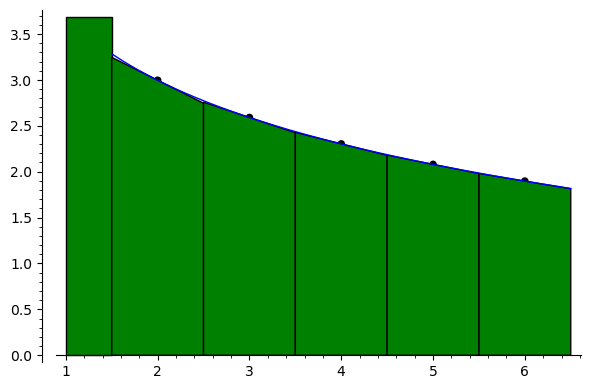

In [2]:
f(x) = log(40/x)
g(x) = derivative(f(x),x)
G = plot(f(x),(x,1+1/2,6+1/2))
G += polygon([[1,0],[1,f(1)],[3/2,f(1)],[3/2,0]],color="green",edgecolor="black")
for n in [2..6]:
    midy = f(n); der = g(n)
    G += polygon([[n-1/2,0],[n-1/2,midy-der/2],[n+1/2,midy+der/2],[n+1/2,0]],color="green",edgecolor="black")
    G += point([n,midy],color="black",size=30)
G.show()

<details>
    <summary>More **censored stuff**.</summary>

The sum was meant itself as a bound on a finer sum, consisting of much narrower bars. If the last term (in the plot: the bar centered on $6$) was meant as a bound on narrow bars going from 6 up to at least $6.5$, then all is well: that is not a very wasteful last bar, and, just as importantly, since the blue curve goes only up to $6.5$, we are not overstepping the range of the original narrow bars. 

If the last term was meant as a bound on narrow bars going from 6 up to somewhere between $6$ and $6.5$, then we have a bit of a problem, or rather a wasteful and somewhat inconvenient final bound. We are better off working with a thicker initial term:    
    
</details>

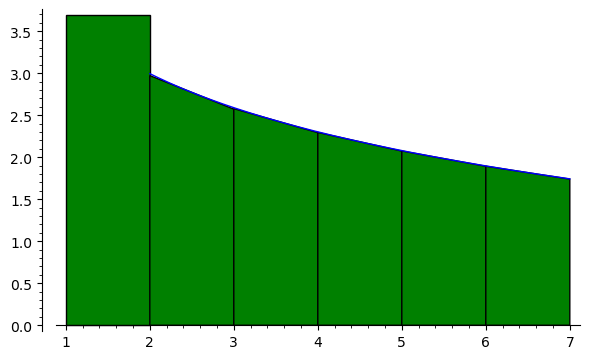

In [3]:
f(x) = log(40/x)
g(x) = derivative(f(x),x)
G = plot(f(x),(x,2,7))
G += polygon([[1,0],[1,f(1)],[2,f(1)],[2,0]],color="green",edgecolor="black")
for n in [2..6]:
    midy = f(n+1/2); der = g(n+1/2)
    G += polygon([[n,0],[n,midy-der/2],[n+1,midy+der/2],[n+1,0]],color="green",edgecolor="black")
    G += point([n,midy],color="black",size=30)
G.show()

<details>
    <summary>More **censored stuff**.</summary>

Let us take totals. If $U\geq Q/2$, then $M = Q/2$, and so, by $q'\leq Q$ and $U\leq x$,
 $$\left(2+\frac{1}{2 e}\right) M + M \log \frac{x}{M} + U \log \frac{e^2 x}{U} - \frac{Q}{2} \log \frac{e^2 x}{Q/2} = \frac{M}{2 e} + U \log \frac{e^2 x}{U} \leq U \log \frac{x}{U} + \left(2 + \frac{1}{2 e}\right) U.$$
    
Moreover, if $U\geq Q/2$, then, by $q'\leq Q$, $U\leq x$ and the fact that $t \log \frac{e x}{t}$ is increasing for $t\leq x$, $$\frac{q'}{2} \log \frac{e x}{Q/2}\leq \frac{Q}{2} \log \frac{e x}{Q/2} \leq U \log \frac{e x}{U}.$$
    
Similarly, $$q' \log \frac{e x}{Q/2} - \frac{q'}{2} \log \frac{e x}{Q/2+q'/2} \leq q' \log \frac{2 e x}{Q} - \frac{q'}{2} \log \frac{e x}{Q} \leq \frac{q'}{2} \log \frac{4 e x}{Q} \leq \frac{Q}{2} \log \frac{2 e x}{Q/2} \leq U \log \frac{2 e x}{U}.$$
    
If $U<Q/2$, then we never needed to consider the range $Q/2< d\leq U$; instead of the terms above, we simply have a bound $$(2+1/2 e) M + M \log \frac{x}{M} = \left(2+\frac{1}{2 e}\right) U + U \log \frac{x}{U}.$$
    
Recall also that $q'>Q/2$.
</details>

In the end, we obtain that $$
\left|\sum_{d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m)\right|\leq \frac{\mu^2(q) x}{q \max(1,\pi \delta)} + 2 U \log \frac{x}{U} + (3 + \frac{1}{2 e} + \log 2) U + q \log \frac{e^2 q}{2} + \frac{3 x}{Q/2} \max\left(\log \frac{e U}{Q/2},0\right). 
$$

We can be a bit wasteful and replace $3+1/(2 e) + \log 2 = 3.877\dotsc$ here by $2 \log 7 = 3.891\dotsc$.

We still have to see clearly that this bound is genuinely log-free. The last term (proportional to $x/(Q/2)$) is harmless, as in practice we always arrange matters so that $Q$ is reasonably large; it is the term $q \log \frac{e^2 q}{2}$ that could concern us. In practice, again, we will be making sure that $q$ is far smaller than $x$, and so the term $q \log \frac{e^2 q}{2}$ will also be harmless. Let us see, however, how a simple final trick suffices to take care of both terms.

Assume only that $\alpha = a/q + O^*(1/q^2)$. Set $Q'' = c \sqrt{x} \geq 1$, where $c$ will be set in a moment. By Dirichlet, there is an approximation $\alpha = a''/q'' + \delta''/x$ to $\alpha$ with $q''\leq Q''$ and $|\delta''/x|< 1/(q'')^2$. Since $q'' \leq Q''$ and our "new" $Q$ is at least $Q''$, we obtain the bound $$\left|\sum_{d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m)\right|\leq \frac{\mu^2(q) x}{q'' \max(1,\pi |\delta''|)} + 2 U \log \frac{7 x}{U} + c \sqrt{x} \log \frac{e^2 c \sqrt{x}}{2} + \frac{6}{c} \sqrt{x} \log \frac{2 e x}{c \sqrt{x}}. 
$$

If $q''\geq q$, we bound $\frac{1}{q'' \max(1,\pi \delta'')} \leq \frac{1}{q}$ and are done. Suppose from now on that $q''<q$. Then, by the triangle inequality, $$\frac{|\delta''|}{x} = \left|\alpha - \frac{a''}{q''}\right| \geq \left|\frac{a''}{q''} - \frac{a}{q}\right| - \left|\alpha - \frac{a}{q}\right| \geq \frac{1}{q q''} - \frac{1}{q^2} = \frac{1}{q q''} \left(1 - \frac{q''}{q}\right),$$ $$\frac{1}{q q''}  \leq \frac{1}{q^2} + \frac{|\delta''|}{x} \leq \frac{1}{q^2} + \frac{1}{q'' Q''}.$$


Let $0<\rho<1$. If $q''/q\leq \rho$, then, by the above and by $1/(1-\epsilon) \leq 1 + \frac{1/(1-\rho) - 1}{\rho} \epsilon = 1 + \frac{\epsilon}{1-\rho}$ for $0\leq \epsilon\leq \rho$,
$$\frac{x}{q'' \cdot \pi |\delta''|} \leq \frac{1/\pi q''}{\frac{1}{q q''} \left(1 - \frac{q''}{q}\right)} = \frac{q/\pi}{1 - \frac{q''}{q}} \leq \frac{q}{\pi} \left(1 + \frac{1}{1-\rho} \frac{q''}{q}\right) \leq \frac{q}{\pi} + \frac{q''}{(1-\rho) \pi} \leq \frac{q}{\pi} + \frac{c\sqrt{x}}{(1-\rho) \pi}.$$

If $q''/q>\rho$, then $$\frac{x}{q''} = x q\cdot \frac{1}{q q''}\leq \frac{x}{q}  + \frac{x q}{q'' Q''} \leq \frac{x}{q} + \frac{x}{\rho Q''} \leq \frac{x}{q} + \frac{\sqrt{x}}{\rho c}.$$

Thus, $$\frac{x}{q'' \max(1,\pi |\delta''|)} \leq \max\left(\frac{x}{q} + \frac{\sqrt{x}}{\rho c}, \frac{q}{\pi} + \frac{c \sqrt{x}}{(1-\rho) \pi}\right).$$

We will set $c$ so as to minimize the terms proportional to $\sqrt{x} \log x$. In other words, we minimize $c + 6/c$ is minimized, i.e., we set $\sqrt{6}$. Then $$c \sqrt{x} \log \frac{e^2 c \sqrt{x}}{2} + \frac{6}{c} \sqrt{x} \log \frac{2 e x}{c \sqrt{x}} = (\sqrt{6} \log x + 3)\sqrt{x}.$$

We also want to minimize $$\max\left(\frac{1}{\rho c}, \frac{c}{(1-\rho) \pi}\right) = \max\left(\frac{1}{\sqrt{6} \rho}, \frac{1}{(1-\rho) \frac{\pi}{\sqrt{6}}}\right),$$
and we do so by setting the denominators equal: $\sqrt{6} \rho = (1-\rho) \frac{\pi}{\sqrt{6}}$, i.e., $\rho = \frac{\pi/\sqrt{6}}{\sqrt{6} + \pi/\sqrt{6}}$, and so the maximum above is $\frac{\sqrt{6}}{\pi} + \frac{1}{\sqrt{6}}$.

We conclude that $$\left|\sum_{d\leq U} \mu(d) \sum_{m\leq x/d} e(\alpha d m)\right|\leq \max\left(\frac{x}{q},\frac{q}{\pi}\right) + 2 U \log \frac{7 x}{U} + \left(\log x + c_1\right) \sqrt{6 x},$$ where $c_1 = \sqrt{3/2} + 1/\pi + 1/6 = 1.709\dotsc$. The term proportional to $\sqrt{6 x}$ is tiny in practice. We could replace the term $\frac{7 x}{U}$ by a multiple of $q$ if we wanted to.

For comparison, Wang and Chen (1994) proved that $$\sum_{d\leq U} \left|\sum_{m\leq x/d} e(\alpha d m)\right| \leq \frac{5 x}{q} \log U + \frac{3}{2} q \log q + 5 q + U \log q,$$ which is of course not $\log$-free.

Vinogradov gives the bound $$\sum_{d\leq U} \left|\sum_{m\leq x/d} e(\alpha d m)\right| \leq \left(\frac{16 x}{q} + \frac{7}{2} q + U\right) \log x,$$  which is also clearly not log-free. (This is his Lemma 8b in "The method of trigonometrical sums.")

In fact, we have proved our bound not just for $\mu$, but for any function of the form $\mu_R$, where $$\mu_R(n) = \begin{cases} \mu((n,R)) &\text{if $p|(n,R) \Rightarrow p^2\nmid n$}\\ 0 &\text{otherwise.}\end{cases}$$ This is important for the sake of making a fair comparison: while Wang and Chen do want to bound the double sum with $\mu(d)$ in the outer sum (and they then ignore $\mu(d)$, taking absolute values), Vinogradov works with a function $\mu_R(d)$ (and then also ignores it). 

We could show how to keep improving our bound:
 * by working directly with $1/\sin(\pi \beta)$, instead of bounding it by $(1/2)/|\{\beta\}|$ (this is what Daboussi and Rivat do; while their bound is not log-free, we can reuse this improvement),
 * by using stronger results on cancellation in $\sum_{d:(d,q)=1} \mu(d)/d$ (this leads to substantial improvements in the term $\max(x/q,q/\pi)$ in the above, though it also makes the proof less elementary and the result more specific to a framework where $\mu(n)$ is used)
 * by working over odd integers only (this is a trick of Tao's, based on the fact that odd numbers constitute an arithmetic progression)

and so forth. There are also the gains to be made from smoothing.

We have, however, reached our main goal, which was to obtain a log-free bound - with good constants. Notice Tao's bound ((5.17) in his five-prime paper) was not log-free, in spite of using smoothing.

Let us skip over all that in this exposition, and go ahead to Type II sums.

### Type II sums

*(still to be written)*
